In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import requests
import json
from IPython.display import display, Markdown
import matplotlib.colors as mcolors

## 1. Aim

Through this project we aim to leverage LLMs to automate the process of safety and health document generation.

We have focused on generating two kinds of documents:

##### 1. Risk Assessment Document

###### 2. Job Safety Analysis Document

## 2. Importing the Dataset

### 2.1 Risk Assessment Dataset

In [27]:
dataset_path = '/home/jovyan/Dissertation/Data-8.xlsx' #Load the dataset
df_risk = pd.read_excel(dataset_path)

In [28]:
# Get the number of rows and columns in the DataFrame
rows, columns = df_risk.shape
# Print the counts of rows and columns
print('The number of rows are', rows)
print('The number of columns are', columns)

The number of rows are 44000
The number of columns are 16


In [29]:
# Print a concise summary of the DataFrame
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44000 entries, 0 to 43999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Activity            44000 non-null  object 
 1   Hazard              44000 non-null  object 
 2   Identified at Risk  44000 non-null  object 
 3   Initial Risk L      44000 non-null  int64  
 4   Initial Risk S      44000 non-null  int64  
 5   Initial Risk R      44000 non-null  int64  
 6   Control Measures    44000 non-null  object 
 7   Residual Risk L     44000 non-null  int64  
 8   Residual Risk S     44000 non-null  int64  
 9   Residual Risk R     44000 non-null  int64  
 10  Remarks             0 non-null      float64
 11  Document Type       44000 non-null  object 
 12  Industry            44000 non-null  object 
 13  Gender              44000 non-null  object 
 14  Country             44000 non-null  object 
 15  Local               44000 non-null  object 
dtypes: f

In [30]:
df_risk.head() #display first five rows of the dataset

,Activity,Hazard,Identified at Risk,Initial Risk L,Initial Risk S,Initial Risk R,Control Measures,Residual Risk L,Residual Risk S,Residual Risk R,Remarks,Document Type,Industry,Gender,Country,Local
0,Site Entrance,Unauthorized access,Security Personnel,1,3,3,Safety induction and visible signage must be p...,1,2,2,NaN,Risk Assessment,Chemicals,Male,Country_5,International
1,Site Entrance,Struck by vehicle,Security Personnel,4,1,4,Safety induction and visible signage must be p...,3,1,3,NaN,Risk Assessment,Chemicals,Male,Country_4,Local
2,Site Entrance,Unauthorized access,Visitors,2,2,4,Safety induction and visible signage must be p...,2,2,4,NaN,Risk Assessment,Construction,Male,Country_1,International
3,Site Entrance,Struck by vehicle,Visitors,3,1,3,Safety induction and visible signage must be p...,2,1,2,NaN,Risk Assessment,Construction,Male,Country_4,Local
4,Site Entrance,Struck by vehicle,Visitors,2,4,8,Safety induction and visible signage must be p...,2,2,4,NaN,Risk Assessment,Chemicals,Male,Country_2,Local


### 2.1.1 Variable Description

| Variable Name        | Description                                       | Type    | Variable Type |
|----------------------|---------------------------------------------------|---------|---------------|
| Activity             | The specific activity where the hazard is identified | object  | Categorical   |
| Hazard               | The type of hazard present                        | object  | Categorical   |
| Identified at Risk   | The individuals at risk                           | object  | Categorical   |
| Initial Risk L       | Initial likelihood of the risk                    | int64   | Numerical     |
| Initial Risk S       | Initial severity of the risk                      | int64   | Numerical     |
| Initial Risk R       | Initial risk rating                               | int64   | Numerical     |
| Control Measures     | Measures implemented to control the hazard        | object  | Categorical   |
| Residual Risk L      | Residual likelihood of the risk after control measures | int64   | Numerical     |
| Residual Risk S      | Residual severity of the risk after control measures | int64   | Numerical     |
| Residual Risk R      | Residual risk rating after control measures       | int64   | Numerical     |
| Remarks              | Additional comments                               | float64 | Categorical   |
| Document Type        | Type of document                                  | object  | Categorical   |
| Industry             | Industry where the activity is performed          | object  | Categorical   |
| Gender               | Gender of the person at risk                      | object  | Categorical   |
| Country              | Country where the activity is performed           | object  | Categorical   |
| Local                | Indicates if the activity is local or international | object  | Categorical   |


### 2.1.2 Missing Values

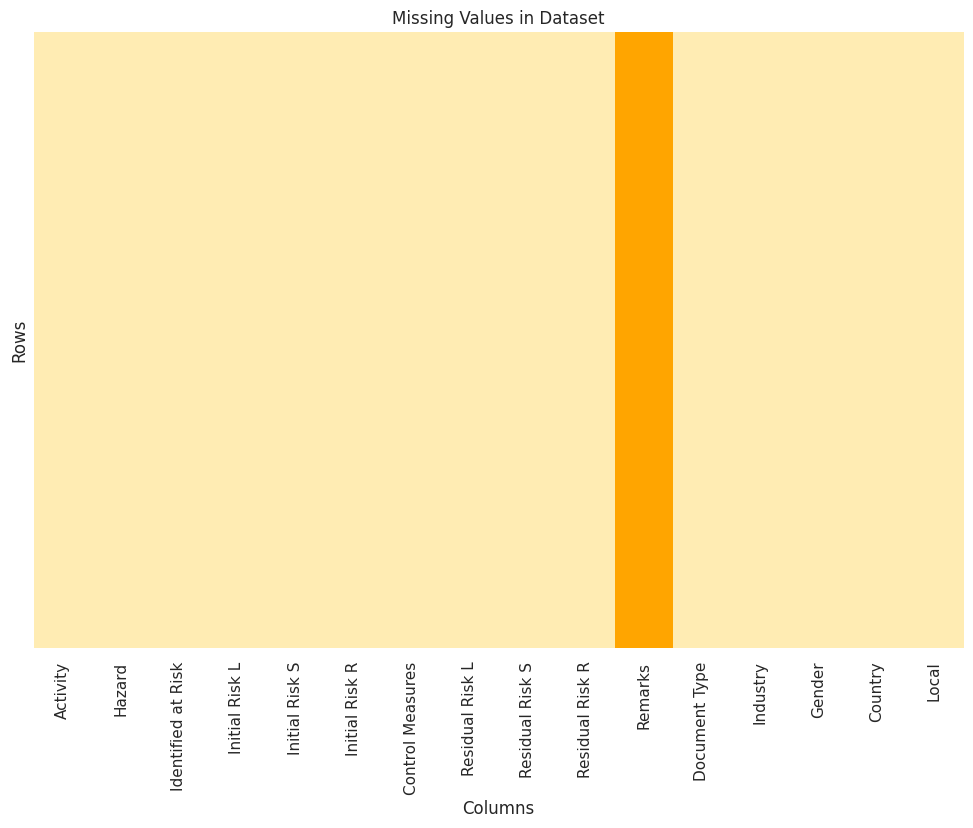

In [31]:
# Check for missing values
missing_values = df_risk.isnull().sum()


# Create a custom colormap: yellow for missing, pastel orange for non-missing
colors = ['#FFECB3', '#FFA500']  # pastel orange and yellow
cmap = ListedColormap(colors)

# Visualize the missing values with the custom colormap
plt.figure(figsize=(12, 8))
sns.heatmap(df_risk.isnull(), cbar=False, cmap=cmap, yticklabels=False)
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

Out of all the variables in the dataset, only 'Remarks' has null values.

### 2.2 Job Safety Analysis Dataset

In [32]:
dataset_path_2 = '/home/jovyan/Dissertation/Consolidated_JSA.xlsx' #load the dataset
df_jsa = pd.read_excel(dataset_path_2)

In [33]:
# Get the number of rows and columns in the DataFrame
rows, columns = df_jsa.shape
# Print the counts of rows and columns
print('The number of rows are', rows)
print('The number of columns are', columns)

The number of rows are 2580
The number of columns are 6


In [34]:
# Print a concise summary of the DataFrame
df_jsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sr.No.                 2570 non-null   object
 1   Sub-Activity Name      2567 non-null   object
 2   Type Of Hazard         2564 non-null   object
 3   Risk(s) Involved       2551 non-null   object
 4   Risk Control measures  2565 non-null   object
 5   Activity               2580 non-null   object
dtypes: object(6)
memory usage: 121.1+ KB


In [35]:
df_jsa.head() #display first five rows of the dataset

,Sr.No.,Sub-Activity Name,Type Of Hazard,Risk(s) Involved,Risk Control measures,Activity
0,1,Manpower Mobilization,Untrained worker,Personal injury,Only inducted worker shall be deputed at the w...,Alluminium door fixing
1,1,Manpower Mobilization,Untrained worker,Personal injury,Given Tool Box Talk to all workers.,Alluminium door fixing
2,1,Manpower Mobilization,Untrained worker,Personal injury,Required work permits should be taken before s...,Alluminium door fixing
3,1,Manpower Mobilization,Untrained worker,Personal injury,Work Shall be carried out under continuous Sup...,Alluminium door fixing
4,2,Fixing of Frame,"Fall of material, fall of man, electric shock,...","Personal Injury, property damage",Ensure only inspected ladder/ scaffold should ...,Alluminium door fixing


### 2.2.1 Variable Description

| Variable Name          | Description                                           | Type   | Variable Type |
|------------------------|-------------------------------------------------------|--------|---------------|
| Sr.No.                 | Serial number of the entry                            | int64  | Numerical     |
| Sub-Activity Name      | Name of the specific sub-activity within a project    | object | Categorical   |
| Type Of Hazard         | The type of hazard identified in the sub-activity     | object | Categorical   |
| Risk(s) Involved       | The risks involved in performing the sub-activity     | object | Categorical   |
| Risk Control measures  | Measures implemented to control identified risks      | object | Categorical   |
| Activity               | The main activity to which the sub-activity belongs   | object | Categorical   |



### 2.2.2 Missing Values

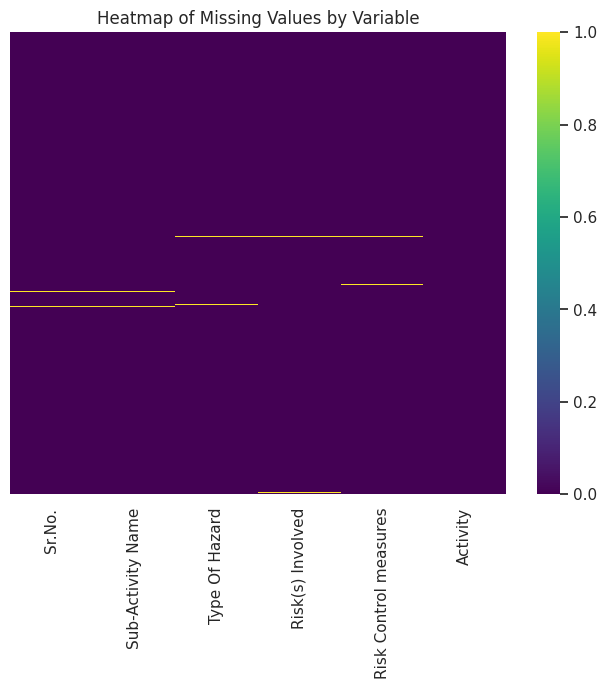

In [36]:
# Calculate missing values
missing_values = df_jsa.isnull()

# Create a heatmap to visualize missing data
plt.figure(figsize=(8, 6))
# Using 'viridis' for a clear visual distinction: missing data will appear in one color, non-missing data in another
sns.heatmap(missing_values, cbar=True, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values by Variable')
plt.show()

## 3. Data Cleaning

### 3.1 Risk Assessment Dataset

In [37]:
# Using the .drop() method to remove the 'Remarks' column from the df_risk DataFrame
df_risk.drop(columns=['Remarks'], inplace=True)  
# 'columns' parameter specifies a list of column names to be removed. 
# 'inplace=True' modifies the DataFrame in place, meaning no new DataFrame is created and df_risk is directly updated.


In [38]:
df_risk.info()  # Displays a summary of the DataFrame including column data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44000 entries, 0 to 43999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Activity            44000 non-null  object
 1   Hazard              44000 non-null  object
 2   Identified at Risk  44000 non-null  object
 3   Initial Risk L      44000 non-null  int64 
 4   Initial Risk S      44000 non-null  int64 
 5   Initial Risk R      44000 non-null  int64 
 6   Control Measures    44000 non-null  object
 7   Residual Risk L     44000 non-null  int64 
 8   Residual Risk S     44000 non-null  int64 
 9   Residual Risk R     44000 non-null  int64 
 10  Document Type       44000 non-null  object
 11  Industry            44000 non-null  object
 12  Gender              44000 non-null  object
 13  Country             44000 non-null  object
 14  Local               44000 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.0+ MB


### 3.2 Job Safety Analysis Dataset

In [39]:
df_jsa.dropna(inplace=True)  # Removes rows with any NaN values in the DataFrame df_jsa and updates it in place.

In [40]:
df_jsa.info()  # Outputs a concise summary of the df_jsa DataFrame, including the data types and non-null counts of each column.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sr.No.                 2535 non-null   object
 1   Sub-Activity Name      2535 non-null   object
 2   Type Of Hazard         2535 non-null   object
 3   Risk(s) Involved       2535 non-null   object
 4   Risk Control measures  2535 non-null   object
 5   Activity               2535 non-null   object
dtypes: object(6)
memory usage: 138.6+ KB


## 4. LLM Building

In order to start LLM modelling. we will first divide our task into two activities :

1. Generating Risk Assessment Document
2. Generating Job Safety Analaysis Document

## For both tasks, the following models have been leveraged:
1. Anthropic \
1.1 claude-3-sonnet-20240229 \
1.2 claude-3-opus-20240229 \



We will first define api keys for both the models which whill help in fetching information from LLMs.

### Accessing the OpenAI API Key

In [41]:
api_key_anthropic=''
#api key has been removed due to privacy reasons

### Accessing the OpenAI Endpoint

In [42]:
api_url_anthropic=''
#api url has been removed due to privacy reasons

### Defining Functions to Interact with the API Key

It is necessary to define functions which will help us in interacting with the LLMs through the API Key.

In [43]:
def get_claude_response(input_text, model=None):
    headers = {
        'Authorization': api_key_anthropic,
        'Content-Type': 'application/json'
    }
    
    if model is None:
        model = "claude-3-opus-20240229"  # Default model
    
    data = {
        "model": model,
        "max_tokens": 1024,
        "messages": [
            {"role": "user", "content": input_text}
        ]
    }
    response = requests.post(api_url_anthropic, json=data, headers=headers)
    
    if response.status_code == 200:
        response_data = response.json()
        return extract_claude_message(response_data)
    else:
        return {"statusCode": response.status_code, "body": response.content.decode('utf-8')}

def extract_claude_message(response_data):
    # Adjust this part based on the actual structure of response_data
    if 'content' in response_data and len(response_data['content']) > 0:
        return response_data['content'][0]['text']
    else:
        return "Error: 'content' not found in response"

def display_message(response):
    if isinstance(response, dict):
        error_message = "Error " + str(response.get("statusCode", "")) + ": " + response.get("body", "")
        markdown_content = "---\n\n" + error_message + "\n\n---"
    else:
        markdown_content = "---\n\n" + response + "\n\n---"

    display(Markdown("<div style='color: #34568B;'>\n\n" + markdown_content + "\n\n</div>"))

To achieve the best results we have performed multiple experiments to see which LLM and which technique effectively helps in achieving the desirable result.

### 4.1 Generating Risk Assessment Document

#### Experiment 1: Detailed Function Based Prompt

##### Activity 1: Site Entrance

In [44]:
def generate_risk_prompt(data, activity_name): # Function to generate a prompt based on the most common risk levels for a specified activity in a DataFrame.
    # Filters the DataFrame 'data' for rows where the 'Activity' column matches the specified activity_name.
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0] # Finds the mode (most frequently occurring value) of the 'Initial Risk L' (Likelihood) column.
    mode_risk_s = activity_data['Initial Risk S'].mode()[0] # Finds the mode of the 'Initial Risk S' (Severity) column.
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)] # Filters 'activity_data' further to include only rows where both risk likelihood and severity match their respective modes.
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Site Entrance'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### claude-3-sonnet-20240229 

In [46]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-sonnet-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

```markdown
# Risk Assessment: Site Entrance

## Hazard 1: Struck by Vehicle
- **Risk Level:** L4, S3, R12
- **Identified at Risk:** Security Personnel, Visitors
- **Control Measures:**
  - Safety induction and visible signage must be present
- **Residual Risk:** L4, S1, R4

## Hazard 2: Unauthorized Access
- **Risk Level:** L4, S3, R12
- **Identified at Risk:** Security Personnel, Visitors
- **Control Measures:**
  - Safety induction and visible signage must be present
- **Residual Risk:** L4, S3, R12
```

---

</div>

### claude-3-opus-20240229

In [47]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-opus-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

# Risk Assessment: Site Entrance

## Hazard 1: Struck by vehicle

- **Risk Level:**
  - Likelihood: 4
  - Severity: 3
  - Risk Rating: 12

- **Identified at risk:**
  - Security Personnel
  - Visitors

- **Control Measures:**
  - Safety induction must be conducted for all personnel and visitors entering the site
  - Visible signage must be present to alert drivers and pedestrians of potential hazards

- **Residual Risk:**
  - Likelihood: 4
  - Severity: 1
  - Risk Rating: 4

## Hazard 2: Unauthorized access

- **Risk Level:**
  - Likelihood: 4
  - Severity: 3
  - Risk Rating: 12

- **Identified at risk:**
  - Security Personnel
  - Visitors

- **Control Measures:**
  - Safety induction must be conducted for all personnel and visitors entering the site
  - Visible signage must be present to inform visitors of restricted areas and the need for authorization

- **Residual Risk:**
  - Likelihood: 4
  - Severity: 3
  - Risk Rating: 12

---

</div>

#### Experiment 2: Detailed Function Based Prompting with Instructions

In [48]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Site Entrance'. Focus on the following details without adding any other additional information such as introductions, recommendations, or meanings. Only include details from the dataset provided:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### claude-3-sonnet-20240229

In [49]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-sonnet-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

```markdown
## Risk Assessment: Site Entrance

### Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

### Hazard: Unauthorized access
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12
```

---

</div>

### claude-3-opus-20240229 Model

In [50]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-opus-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

# Risk Assessment: Site Entrance

## Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

## Hazard: Unauthorized access
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12

---

</div>

### Risk Rating Matrix

Generate a risk assessment document in markdown format for the activity 'Site Entrance'. Focus on the following details:
- Hazard: Struck by vehicle, Risk Level: L4, S3, R12, Identified at risk: Visitors, Control Measures: Safety induction and visible signage must be present, Residual Risk: L2, S2, R4
- Hazard: Unauthorized access, Risk Level: L4, S3, R12, Identified at risk: Visitors, Control Measures: Safety induction and visible signage must be present, Residual Risk: L4, S3, R12



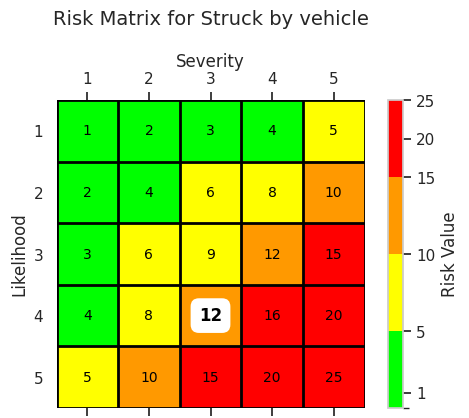

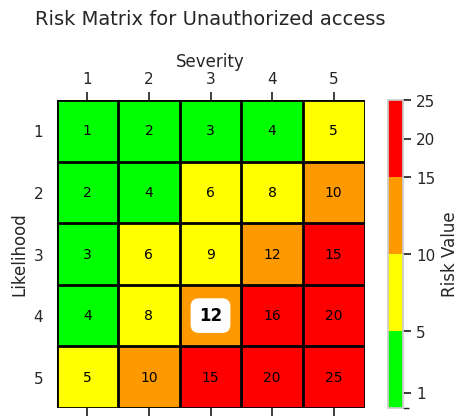

In [51]:
# Function to generate risk assessment prompt
def generate_risk_prompt(data, activity_name):
    # Filter and process data
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    mode_at_risk = activity_data['Identified at Risk'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s) &
        (activity_data['Identified at Risk'] == mode_at_risk)
    ]
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R using mode values
    unique_hazard_data['Initial Risk R'] = mode_risk_l * mode_risk_s
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the risk assessment document
    prompt = f"Generate a risk assessment document in markdown format for the activity '{activity_name}'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{mode_risk_l}, S{mode_risk_s}, R{row['Initial Risk R']}, Identified at risk: {row['Identified at Risk']}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt, unique_hazard_data, mode_risk_l, mode_risk_s

# Function to plot risk matrix for each hazard
def plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s):
    for index, row in hazard_data.iterrows():
        hazard = row['Hazard']
        initial_risk = row['Initial Risk R']
        likelihood = mode_risk_l
        severity = mode_risk_s

        # Define risk matrix dimensions
        likelihood_values = np.arange(1, 6)
        severity_values = np.arange(1, 6)
        risk_matrix = np.zeros((5, 5))

        # Fill the matrix with risk values
        for l in likelihood_values:
            for s in severity_values:
                risk_matrix[l-1, s-1] = l * s

        # Define the custom color map
        colors = ['#00FF00', '#FFFF00', '#FF9900', '#FF0000']  # green, yellow, orange, red
        cmap = mcolors.ListedColormap(colors)
        bounds = [0, 5, 10, 15, 25]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Plotting the risk matrix
        fig, ax = plt.subplots(figsize=(6, 4))
        cax = ax.matshow(risk_matrix, cmap=cmap, norm=norm)

        # Annotate cells with risk value and highlight the specified cell
        for i in range(5):
            for j in range(5):
                risk_value = int(risk_matrix[i, j])
                if (i+1 == likelihood) and (j+1 == severity):
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', weight='bold', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
                else:
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', fontsize=10)

        # Set labels
        ax.set_xticks(np.arange(5))
        ax.set_yticks(np.arange(5))
        ax.set_xticklabels(['1', '2', '3', '4', '5'])
        ax.set_yticklabels(['1', '2', '3', '4', '5'])
        ax.set_xlabel('Severity', fontsize=12)
        ax.set_ylabel('Likelihood', fontsize=12)
        ax.xaxis.set_label_position('top') 
        plt.title(f'Risk Matrix for {hazard}', fontsize=14, pad=20)
        plt.colorbar(cax, label='Risk Value', boundaries=bounds, ticks=[1, 5, 10, 15, 20, 25])

        # Remove grid lines
        ax.grid(False)

        # Add some stylistic elements
        ax.spines[:].set_visible(False)
        ax.set_xticks(np.arange(5+1)-.5, minor=True)
        ax.set_yticks(np.arange(5+1)-.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(which="minor", size=0)
        
        plt.show()
# Use the provided df_risk DataFrame
activity_name = 'Site Entrance'
prompt, hazard_data, mode_risk_l, mode_risk_s = generate_risk_prompt(df_risk, activity_name)
print(prompt)
plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s)

### Activity 2: Excavation

##### Experiment 1: Detailed Function Based Prompting

In [52]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Excavation'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### claude-3-sonnet-20240229

In [53]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-sonnet-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

```markdown
# Risk Assessment: Excavation

## Hazard: Struck by Vehicle
- **Risk Level:** L4, S3, R12
- **Identified at Risk:** Security Personnel, Visitors
- **Control Measures:** Safety induction and visible signage must be present
- **Residual Risk:** L4, S1, R4

## Hazard: Unauthorized Access
- **Risk Level:** L4, S3, R12
- **Identified at Risk:** Security Personnel, Visitors
- **Control Measures:** Safety induction and visible signage must be present
- **Residual Risk:** L4, S3, R12
```

---

</div>

### claude-3-opus-20240229

In [54]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-opus-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

# Risk Assessment: Excavation

## Hazard 1: Struck by Vehicle

**Risk Level:**
- Likelihood: 4
- Severity: 3
- Risk Rating: 12

**Identified at Risk:**
- Security Personnel
- Visitors

**Control Measures:**
- Safety induction must be conducted for all personnel involved in the excavation activity
- Visible signage must be present around the excavation area to alert vehicles and pedestrians

**Residual Risk:**
- Likelihood: 4
- Severity: 1
- Risk Rating: 4

## Hazard 2: Unauthorized Access

**Risk Level:**
- Likelihood: 4
- Severity: 3
- Risk Rating: 12

**Identified at Risk:**
- Security Personnel
- Visitors

**Control Measures:**
- Safety induction must be conducted for all personnel involved in the excavation activity
- Visible signage must be present around the excavation area to deter unauthorized access

**Residual Risk:**
- Likelihood: 4
- Severity: 3
- Risk Rating: 12

## Risk Matrix

| Likelihood | Severity | Risk Rating |
|------------|----------|-------------|
| 1          | 1        | 1           |
| 2          | 2        | 4           |
| 3          | 3        | 9           |
| 4          | 4        | 16          |

**Likelihood:**
1. Rare
2. Unlikely
3. Possible
4. Likely

**Severity:**
1. Minor
2. Moderate
3. Major
4. Catastrophic

**Risk Rating:**
- 1-3: Low
- 4-6: Medium
- 8-12: High
- 15-16: Extreme

Note: The residual risk for "Unauthorized Access" remains unchanged as the control measures do not effectively reduce the risk level.

---

</div>

##### Experiment 2: Function Based Prompt with Intructions

In [55]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Excavation'. Focus on the following details without adding any other additional information such as introductions, recommendations, or meanings. Only include details from the dataset provided:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### claude-3-sonnet-20240229

In [56]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-sonnet-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

```markdown
## Risk Assessment: Excavation

### Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

### Hazard: Unauthorized access
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12
```

---

</div>

### claude-3-opus-20240229

In [57]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-opus-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

# Risk Assessment: Excavation

## Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

## Hazard: Unauthorized access
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12

---

</div>

### Risk Rating Matrix

Generate a risk assessment document in markdown format for the activity 'Excavation'. Focus on the following details:
- Hazard: Collapse of sides, Risk Level: L1, S1, R1, Identified at risk: Excavation Workers, Control Measures: Use of protective systems like sloping, shoring, and shielding., Residual Risk: L1, S1, R1
- Hazard: Falling into excavation, Risk Level: L1, S1, R1, Identified at risk: Excavation Workers, Control Measures: Use of protective systems like sloping, shoring, and shielding., Residual Risk: L1, S1, R1



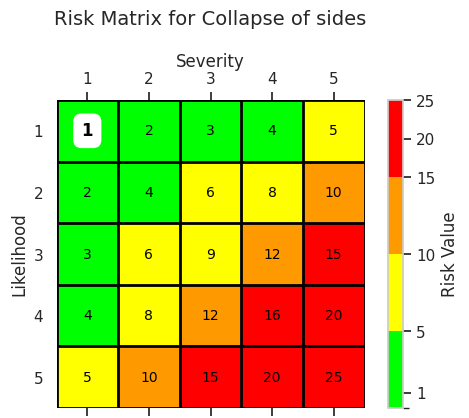

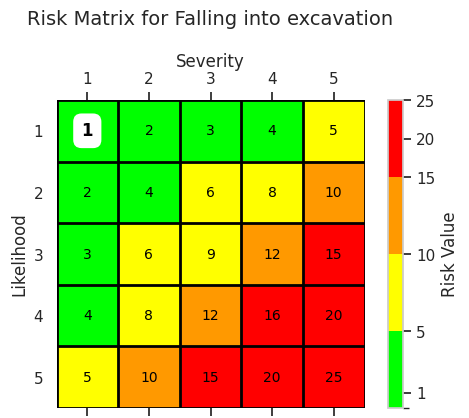

In [58]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    mode_at_risk = activity_data['Identified at Risk'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s) &
        (activity_data['Identified at Risk'] == mode_at_risk)
    ]
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R using mode values
    unique_hazard_data['Initial Risk R'] = mode_risk_l * mode_risk_s
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the risk assessment document
    prompt = f"Generate a risk assessment document in markdown format for the activity '{activity_name}'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{mode_risk_l}, S{mode_risk_s}, R{row['Initial Risk R']}, Identified at risk: {row['Identified at Risk']}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt, unique_hazard_data, mode_risk_l, mode_risk_s

# Function to plot risk matrix for each hazard
def plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s):
    for index, row in hazard_data.iterrows():
        hazard = row['Hazard']
        initial_risk = row['Initial Risk R']
        likelihood = mode_risk_l
        severity = mode_risk_s

        # Define risk matrix dimensions
        likelihood_values = np.arange(1, 6)
        severity_values = np.arange(1, 6)
        risk_matrix = np.zeros((5, 5))

        # Fill the matrix with risk values
        for l in likelihood_values:
            for s in severity_values:
                risk_matrix[l-1, s-1] = l * s

        # Define the custom color map
        colors = ['#00FF00', '#FFFF00', '#FF9900', '#FF0000']  # green, yellow, orange, red
        cmap = mcolors.ListedColormap(colors)
        bounds = [0, 5, 10, 15, 25]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Plotting the risk matrix
        fig, ax = plt.subplots(figsize=(6, 4))
        cax = ax.matshow(risk_matrix, cmap=cmap, norm=norm)

        # Annotate cells with risk value and highlight the specified cell
        for i in range(5):
            for j in range(5):
                risk_value = int(risk_matrix[i, j])
                if (i+1 == likelihood) and (j+1 == severity):
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', weight='bold', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
                else:
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', fontsize=10)

        # Set labels
        ax.set_xticks(np.arange(5))
        ax.set_yticks(np.arange(5))
        ax.set_xticklabels(['1', '2', '3', '4', '5'])
        ax.set_yticklabels(['1', '2', '3', '4', '5'])
        ax.set_xlabel('Severity', fontsize=12)
        ax.set_ylabel('Likelihood', fontsize=12)
        ax.xaxis.set_label_position('top') 
        plt.title(f'Risk Matrix for {hazard}', fontsize=14, pad=20)
        plt.colorbar(cax, label='Risk Value', boundaries=bounds, ticks=[1, 5, 10, 15, 20, 25])

        # Remove grid lines
        ax.grid(False)

        # Add some stylistic elements
        ax.spines[:].set_visible(False)
        ax.set_xticks(np.arange(5+1)-.5, minor=True)
        ax.set_yticks(np.arange(5+1)-.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(which="minor", size=0)
        
        plt.show()
# Use the provided df_risk DataFrame
activity_name = 'Excavation'
prompt, hazard_data, mode_risk_l, mode_risk_s = generate_risk_prompt(df_risk, activity_name)
print(prompt)
plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s)

### Activity 3: Delivery Vehicles and Drivers

##### Experiment 1: Defined Function Based Prompting

In [59]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Delivery vehicles & drivers'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### claude-3-sonnet-20240229

In [66]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-sonnet-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

```
# Risk Assessment: Delivery vehicles & drivers

## Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

## Hazard: Unauthorized access
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12
```

---

</div>

### claude-3-opus-20240229

In [61]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-opus-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

# Risk Assessment: Delivery Vehicles & Drivers

## Hazard: Struck by Vehicle

**Risk Level:** L4, S3, R12

**Identified at Risk:**
- Security Personnel
- Visitors

**Control Measures:**
- Safety induction must be conducted for all personnel and visitors
- Visible signage must be present to alert individuals of potential vehicle hazards

**Residual Risk:** L4, S1, R4

## Hazard: Unauthorized Access

**Risk Level:** L4, S3, R12

**Identified at Risk:**
- Security Personnel
- Visitors

**Control Measures:**
- Safety induction must be conducted for all personnel and visitors
- Visible signage must be present to inform individuals about restricted areas and the requirement for authorization

**Residual Risk:** L4, S3, R12

### Additional Recommendations:
- Implement a visitor management system to track and control access to the premises
- Ensure all delivery vehicles are properly maintained and equipped with necessary safety features
- Provide regular training to security personnel on managing vehicle traffic and preventing unauthorized access
- Conduct periodic reviews of the risk assessment and update control measures as necessary

By adhering to the identified control measures and recommendations, the risks associated with delivery vehicles and drivers can be effectively managed, ensuring the safety of security personnel and visitors.

---

</div>

#### Experiment 2: Function Based Prompting with Instructions

In [62]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Delivery vehicles & drivers'. Focus on the following details without adding any other additional information such as introductions, recommendations, or meanings. Only include details from the dataset provided:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt


### claude-3-sonnet-20240229

In [65]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-sonnet-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

```markdown
## Risk Assessment: Delivery vehicles & drivers

### Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

### Hazard: Unauthorized access
- Risk Level: L4, S3, R12  
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12
```

---

</div>

### claude-3-opus-20240229

In [67]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-opus-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

# Risk Assessment: Delivery vehicles & drivers

## Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

## Hazard: Unauthorized access
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12

---

</div>

### Risk Rating Matrix

Generate a risk assessment document in markdown format for the activity 'Delivery vehicles & drivers'. Focus on the following details:
- Hazard: Collision, Risk Level: L4, S1, R4, Identified at risk: Logistics Personnel, Control Measures: Scheduled deliveries and trained staff for loading operations., Residual Risk: L1, S1, R1
- Hazard: Loading and unloading injuries, Risk Level: L4, S1, R4, Identified at risk: Logistics Personnel, Control Measures: Scheduled deliveries and trained staff for loading operations., Residual Risk: L1, S1, R1



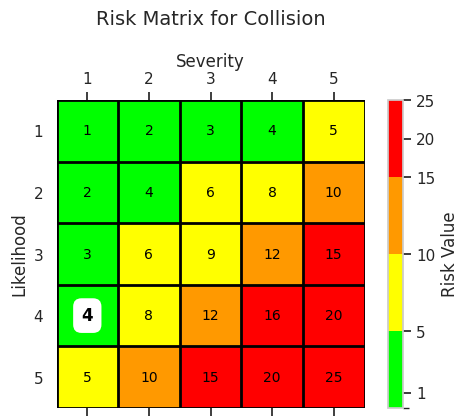

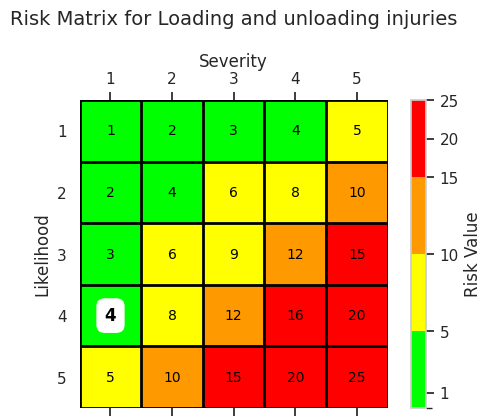

In [68]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    mode_at_risk = activity_data['Identified at Risk'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s) &
        (activity_data['Identified at Risk'] == mode_at_risk)
    ]
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R using mode values
    unique_hazard_data['Initial Risk R'] = mode_risk_l * mode_risk_s
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the risk assessment document
    prompt = f"Generate a risk assessment document in markdown format for the activity '{activity_name}'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{mode_risk_l}, S{mode_risk_s}, R{row['Initial Risk R']}, Identified at risk: {row['Identified at Risk']}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt, unique_hazard_data, mode_risk_l, mode_risk_s

# Function to plot risk matrix for each hazard
def plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s):
    for index, row in hazard_data.iterrows():
        hazard = row['Hazard']
        initial_risk = row['Initial Risk R']
        likelihood = mode_risk_l
        severity = mode_risk_s

        # Define risk matrix dimensions
        likelihood_values = np.arange(1, 6)
        severity_values = np.arange(1, 6)
        risk_matrix = np.zeros((5, 5))

        # Fill the matrix with risk values
        for l in likelihood_values:
            for s in severity_values:
                risk_matrix[l-1, s-1] = l * s

        # Define the custom color map
        colors = ['#00FF00', '#FFFF00', '#FF9900', '#FF0000']  # green, yellow, orange, red
        cmap = mcolors.ListedColormap(colors)
        bounds = [0, 5, 10, 15, 25]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Plotting the risk matrix
        fig, ax = plt.subplots(figsize=(6, 4))
        cax = ax.matshow(risk_matrix, cmap=cmap, norm=norm)

        # Annotate cells with risk value and highlight the specified cell
        for i in range(5):
            for j in range(5):
                risk_value = int(risk_matrix[i, j])
                if (i+1 == likelihood) and (j+1 == severity):
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', weight='bold', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
                else:
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', fontsize=10)

        # Set labels
        ax.set_xticks(np.arange(5))
        ax.set_yticks(np.arange(5))
        ax.set_xticklabels(['1', '2', '3', '4', '5'])
        ax.set_yticklabels(['1', '2', '3', '4', '5'])
        ax.set_xlabel('Severity', fontsize=12)
        ax.set_ylabel('Likelihood', fontsize=12)
        ax.xaxis.set_label_position('top') 
        plt.title(f'Risk Matrix for {hazard}', fontsize=14, pad=20)
        plt.colorbar(cax, label='Risk Value', boundaries=bounds, ticks=[1, 5, 10, 15, 20, 25])

        # Remove grid lines
        ax.grid(False)

        # Add some stylistic elements
        ax.spines[:].set_visible(False)
        ax.set_xticks(np.arange(5+1)-.5, minor=True)
        ax.set_yticks(np.arange(5+1)-.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(which="minor", size=0)
        
        plt.show()
# Use the provided df_risk DataFrame
activity_name = 'Delivery vehicles & drivers'
prompt, hazard_data, mode_risk_l, mode_risk_s = generate_risk_prompt(df_risk, activity_name)
print(prompt)
plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s)

### Activity 4: Dewatering

#### Experiment 1: Defined Function Based Prompting

In [69]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Dewatering'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt


### claude-3-sonnet-20240229

In [71]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-sonnet-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

# Risk Assessment for Dewatering Activity

## Hazard: Struck by Vehicle

- **Risk Level:** L4, S3, R12
- **Identified at Risk:** Security Personnel, Visitors

### Control Measures:

- Safety induction and visible signage must be present.

### Residual Risk:

- L4, S1, R4

## Hazard: Unauthorized Access

- **Risk Level:** L4, S3, R12
- **Identified at Risk:** Security Personnel, Visitors

### Control Measures:

- Safety induction and visible signage must be present.

### Residual Risk:

- L4, S3, R12

---

</div>

### claude-3-opus-20240229

In [72]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-opus-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

# Risk Assessment: Dewatering

## Hazard: Struck by Vehicle

**Risk Level:**
- Likelihood: 4
- Severity: 3
- Risk Rating: 12

**Identified at Risk:**
- Security Personnel
- Visitors

**Control Measures:**
- Safety induction must be conducted for all personnel involved in the activity
- Visible signage must be present to alert personnel of the potential hazard

**Residual Risk:**
- Likelihood: 4
- Severity: 1
- Risk Rating: 4

## Hazard: Unauthorized Access

**Risk Level:**
- Likelihood: 4
- Severity: 3
- Risk Rating: 12

**Identified at Risk:**
- Security Personnel
- Visitors

**Control Measures:**
- Safety induction must be conducted for all personnel involved in the activity
- Visible signage must be present to alert personnel of the potential hazard

**Residual Risk:**
- Likelihood: 4
- Severity: 3
- Risk Rating: 12

---

**Risk Matrix:**

| Likelihood | Severity | Risk Rating |
|------------|----------|-------------|
| 1          | 1        | 1           |
| 2          | 2        | 4           |
| 3          | 3        | 9           |
| 4          | 4        | 16          |

**Likelihood:**
1. Rare
2. Unlikely
3. Possible
4. Likely

**Severity:**
1. Insignificant
2. Minor
3. Moderate
4. Major

**Risk Rating:**
- 1-3: Low
- 4-6: Medium
- 8-12: High
- 15-16: Extreme

---

</div>

#### Experiment 2: Defined Function Based Prompt with Instructions

In [73]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Dewatering'. Focus on the following details without adding any other additional information such as introductions, recommendations, or meanings. Only include details from the dataset provided:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### claude-3-sonnet-20240229

In [76]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-sonnet-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

```markdown
## Risk Assessment for Dewatering

### Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

### Hazard: Unauthorized access
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12
```

---

</div>

### claude-3-opus-20240229

In [75]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-opus-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

# Risk Assessment: Dewatering

## Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

## Hazard: Unauthorized access
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12

---

</div>

### Risk Rating Matrix

Generate a risk assessment document in markdown format for the activity 'Dewatering'. Focus on the following details:
- Hazard: Drowning, Risk Level: L4, S3, R12, Identified at risk: Machine Operators, Control Measures: Use of submersible pumps, GFCI devices, and ensuring electrical safety., Residual Risk: L3, S2, R6
- Hazard: Electrocution, Risk Level: L4, S3, R12, Identified at risk: Machine Operators, Control Measures: Use of submersible pumps, GFCI devices, and ensuring electrical safety., Residual Risk: L4, S2, R8



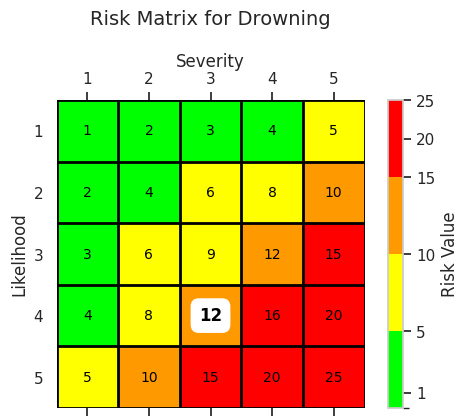

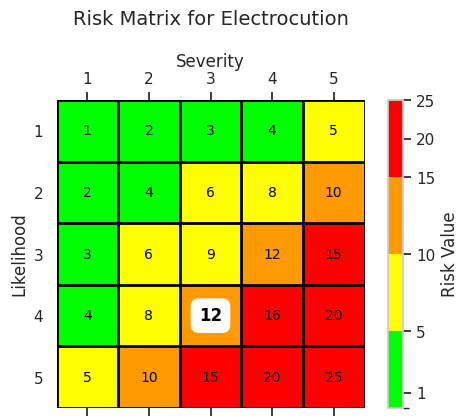

In [77]:
# Function to generate risk assessment prompt
def generate_risk_prompt(data, activity_name):
    # Filter and process data
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    mode_at_risk = activity_data['Identified at Risk'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s) &
        (activity_data['Identified at Risk'] == mode_at_risk)
    ]
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R using mode values
    unique_hazard_data['Initial Risk R'] = mode_risk_l * mode_risk_s
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the risk assessment document
    prompt = f"Generate a risk assessment document in markdown format for the activity '{activity_name}'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{mode_risk_l}, S{mode_risk_s}, R{row['Initial Risk R']}, Identified at risk: {row['Identified at Risk']}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt, unique_hazard_data, mode_risk_l, mode_risk_s

# Function to plot risk matrix for each hazard
def plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s):
    for index, row in hazard_data.iterrows():
        hazard = row['Hazard']
        initial_risk = row['Initial Risk R']
        likelihood = mode_risk_l
        severity = mode_risk_s

        # Define risk matrix dimensions
        likelihood_values = np.arange(1, 6)
        severity_values = np.arange(1, 6)
        risk_matrix = np.zeros((5, 5))

        # Fill the matrix with risk values
        for l in likelihood_values:
            for s in severity_values:
                risk_matrix[l-1, s-1] = l * s

        # Define the custom color map
        colors = ['#00FF00', '#FFFF00', '#FF9900', '#FF0000']  # green, yellow, orange, red
        cmap = mcolors.ListedColormap(colors)
        bounds = [0, 5, 10, 15, 25]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Plotting the risk matrix
        fig, ax = plt.subplots(figsize=(6, 4))
        cax = ax.matshow(risk_matrix, cmap=cmap, norm=norm)

        # Annotate cells with risk value and highlight the specified cell
        for i in range(5):
            for j in range(5):
                risk_value = int(risk_matrix[i, j])
                if (i+1 == likelihood) and (j+1 == severity):
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', weight='bold', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
                else:
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', fontsize=10)

        # Set labels
        ax.set_xticks(np.arange(5))
        ax.set_yticks(np.arange(5))
        ax.set_xticklabels(['1', '2', '3', '4', '5'])
        ax.set_yticklabels(['1', '2', '3', '4', '5'])
        ax.set_xlabel('Severity', fontsize=12)
        ax.set_ylabel('Likelihood', fontsize=12)
        ax.xaxis.set_label_position('top') 
        plt.title(f'Risk Matrix for {hazard}', fontsize=14, pad=20)
        plt.colorbar(cax, label='Risk Value', boundaries=bounds, ticks=[1, 5, 10, 15, 20, 25])

        # Remove grid lines
        ax.grid(False)

        # Add some stylistic elements
        ax.spines[:].set_visible(False)
        ax.set_xticks(np.arange(5+1)-.5, minor=True)
        ax.set_yticks(np.arange(5+1)-.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(which="minor", size=0)
        
        plt.show()
# Use the provided df_risk DataFrame
activity_name = 'Dewatering'
prompt, hazard_data, mode_risk_l, mode_risk_s = generate_risk_prompt(df_risk, activity_name)
print(prompt)
plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s)

### Activity 5: Shuttering

#### Experiment 1: Function Based Prompting

In [78]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Shuttering'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt


### claude-3-sonnet-20240229

In [79]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-sonnet-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

```markdown
# Risk Assessment: Shuttering

## Hazard: Struck by vehicle
- **Risk Level:** L4, S3, R12
- **Identified at risk:** Security Personnel, Visitors
- **Control Measures:** Safety induction and visible signage must be present
- **Residual Risk:** L4, S1, R4

## Hazard: Unauthorized access
- **Risk Level:** L4, S3, R12
- **Identified at risk:** Security Personnel, Visitors
- **Control Measures:** Safety induction and visible signage must be present
- **Residual Risk:** L4, S3, R12
```

---

</div>

### claude-3-opus-20240229

In [80]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-opus-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

# Risk Assessment: Shuttering

## Hazard: Struck by vehicle
- Risk Level:
  - Likelihood: 4
  - Severity: 3
  - Risk Rating: 12
- Identified at risk:
  - Security Personnel
  - Visitors
- Control Measures:
  - Safety induction must be conducted for all personnel involved
  - Visible signage must be present to alert drivers and pedestrians
- Residual Risk:
  - Likelihood: 4
  - Severity: 1
  - Risk Rating: 4

## Hazard: Unauthorized access
- Risk Level:
  - Likelihood: 4
  - Severity: 3
  - Risk Rating: 12
- Identified at risk:
  - Security Personnel
  - Visitors
- Control Measures:
  - Safety induction must be conducted for all personnel involved
  - Visible signage must be present to indicate restricted areas
- Residual Risk:
  - Likelihood: 4
  - Severity: 3
  - Risk Rating: 12

---

</div>

#### Experiment 2: Defined Function based Prompt with Instructions

In [81]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Shuttering'. Focus on the following details without adding any other additional information such as introductions, recommendations, or meanings. Only include details from the dataset provided:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### claude-3-sonnet-20240229

In [82]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-sonnet-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

```markdown
## Risk Assessment: Shuttering

### Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

### Hazard: Unauthorized access
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12
```

---

</div>

### claude-3-opus-20240229

In [83]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-opus-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

# Risk Assessment: Shuttering

## Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk:
  - Security Personnel
  - Visitors
- Control Measures:
  - Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

## Hazard: Unauthorized access
- Risk Level: L4, S3, R12
- Identified at risk:
  - Security Personnel
  - Visitors
- Control Measures:
  - Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12

---

</div>

### Risk Rating Matrix

Generate a risk assessment document in markdown format for the activity 'Shuttering'. Focus on the following details:
- Hazard: Falling objects, Risk Level: L1, S4, R4, Identified at risk: Construction Workers, Control Measures: Mandatory use of helmets and clearing pathways., Residual Risk: L1, S2, R2
- Hazard: Tripping hazards, Risk Level: L1, S4, R4, Identified at risk: Construction Workers, Control Measures: Mandatory use of helmets and clearing pathways., Residual Risk: L1, S2, R2



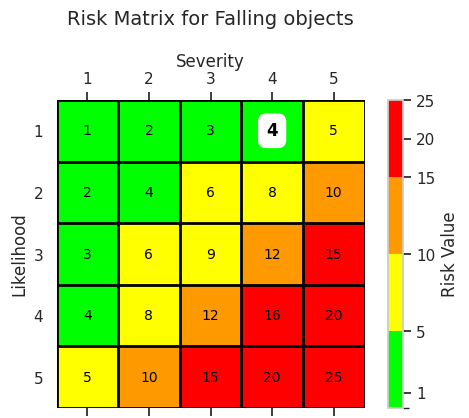

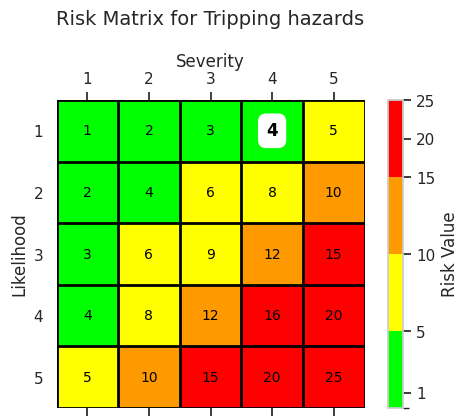

In [84]:
# Function to generate risk assessment prompt
def generate_risk_prompt(data, activity_name):
    # Filter and process data
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    mode_at_risk = activity_data['Identified at Risk'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s) &
        (activity_data['Identified at Risk'] == mode_at_risk)
    ]
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R using mode values
    unique_hazard_data['Initial Risk R'] = mode_risk_l * mode_risk_s
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the risk assessment document
    prompt = f"Generate a risk assessment document in markdown format for the activity '{activity_name}'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{mode_risk_l}, S{mode_risk_s}, R{row['Initial Risk R']}, Identified at risk: {row['Identified at Risk']}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt, unique_hazard_data, mode_risk_l, mode_risk_s

# Function to plot risk matrix for each hazard
def plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s):
    for index, row in hazard_data.iterrows():
        hazard = row['Hazard']
        initial_risk = row['Initial Risk R']
        likelihood = mode_risk_l
        severity = mode_risk_s

        # Define risk matrix dimensions
        likelihood_values = np.arange(1, 6)
        severity_values = np.arange(1, 6)
        risk_matrix = np.zeros((5, 5))

        # Fill the matrix with risk values
        for l in likelihood_values:
            for s in severity_values:
                risk_matrix[l-1, s-1] = l * s

        # Define the custom color map
        colors = ['#00FF00', '#FFFF00', '#FF9900', '#FF0000']  # green, yellow, orange, red
        cmap = mcolors.ListedColormap(colors)
        bounds = [0, 5, 10, 15, 25]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Plotting the risk matrix
        fig, ax = plt.subplots(figsize=(6, 4))
        cax = ax.matshow(risk_matrix, cmap=cmap, norm=norm)

        # Annotate cells with risk value and highlight the specified cell
        for i in range(5):
            for j in range(5):
                risk_value = int(risk_matrix[i, j])
                if (i+1 == likelihood) and (j+1 == severity):
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', weight='bold', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
                else:
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', fontsize=10)

        # Set labels
        ax.set_xticks(np.arange(5))
        ax.set_yticks(np.arange(5))
        ax.set_xticklabels(['1', '2', '3', '4', '5'])
        ax.set_yticklabels(['1', '2', '3', '4', '5'])
        ax.set_xlabel('Severity', fontsize=12)
        ax.set_ylabel('Likelihood', fontsize=12)
        ax.xaxis.set_label_position('top') 
        plt.title(f'Risk Matrix for {hazard}', fontsize=14, pad=20)
        plt.colorbar(cax, label='Risk Value', boundaries=bounds, ticks=[1, 5, 10, 15, 20, 25])

        # Remove grid lines
        ax.grid(False)

        # Add some stylistic elements
        ax.spines[:].set_visible(False)
        ax.set_xticks(np.arange(5+1)-.5, minor=True)
        ax.set_yticks(np.arange(5+1)-.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(which="minor", size=0)
        
        plt.show()
# Use the provided df_risk DataFrame
activity_name = 'Shuttering'
prompt, hazard_data, mode_risk_l, mode_risk_s = generate_risk_prompt(df_risk, activity_name)
print(prompt)
plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s)

### Activity 6: Concreting

##### Experiment 1: Defined Function Based Prompting

In [85]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Concreting'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt


### claude-3-sonnet-20240229

In [88]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-sonnet-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

```markdown
# Risk Assessment: Concreting

## Hazard 1: Struck by Vehicle

- Risk Level: L4, S3, R12
- Identified at Risk: Security Personnel, Visitors

### Control Measures:
- Safety induction and visible signage must be present.

### Residual Risk: L4, S1, R4

## Hazard 2: Unauthorized Access

- Risk Level: L4, S3, R12
- Identified at Risk: Security Personnel, Visitors

### Control Measures:
- Safety induction and visible signage must be present.

### Residual Risk: L4, S3, R12
```

---

</div>

### claude-3-opus-20240229

In [87]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-opus-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

# Risk Assessment: Concreting

## Hazard: Struck by vehicle
- Risk Level:
  - Likelihood: 4
  - Severity: 3
  - Risk Rating: 12
- Identified at risk:
  - Security Personnel
  - Visitors
- Control Measures:
  - Safety induction must be conducted for all personnel involved in the activity
  - Visible signage must be present to alert vehicles and pedestrians of the ongoing work
- Residual Risk:
  - Likelihood: 4
  - Severity: 1
  - Risk Rating: 4

## Hazard: Unauthorized access
- Risk Level:
  - Likelihood: 4
  - Severity: 3
  - Risk Rating: 12
- Identified at risk:
  - Security Personnel
  - Visitors
- Control Measures:
  - Safety induction must be conducted for all personnel involved in the activity
  - Visible signage must be present to restrict access to the work area
- Residual Risk:
  - Likelihood: 4
  - Severity: 3
  - Risk Rating: 12

Please note that this risk assessment is based on the provided information and may require further evaluation and adaptation to suit the specific worksite and conditions. It is essential to regularly review and update the risk assessment as the work progresses or if any changes occur.

---

</div>

#### Experiment 2: Defined Function Based prompting with Instructions

In [89]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Concreting'. Focus on the following details without adding any other additional information such as introductions, recommendations, or meanings. Only include details from the dataset provided:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### claude-3-sonnet-20240229

In [90]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-sonnet-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

```markdown
# Risk Assessment for Concreting

## Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

## Hazard: Unauthorized access
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12
```

---

</div>

### claude-3-opus-20240229

In [91]:
df = df_risk  # Adjust the file path as necessary

# Generate the summary prompt using the more detailed method
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Get the LLM response
summary = get_claude_response(risk_assessment_prompt, model="claude-3-opus-20240229")
display_message(summary)

<div style='color: #34568B;'>

---

# Risk Assessment: Concreting

## Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

## Hazard: Unauthorized access
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12

---

</div>

### Risk Rating Matrix

Generate a risk assessment document in markdown format for the activity 'Concreting'. Focus on the following details:
- Hazard: Eye damage, Risk Level: L5, S3, R15, Identified at risk: Concrete Workers, Control Measures: Provision of protective gear like gloves and eye protection, use skin protection and dust masks., Residual Risk: L5, S3, R15
- Hazard: Skin irritation, Risk Level: L5, S3, R15, Identified at risk: Concrete Workers, Control Measures: Provision of protective gear like gloves and eye protection, use skin protection and dust masks., Residual Risk: L2, S2, R4



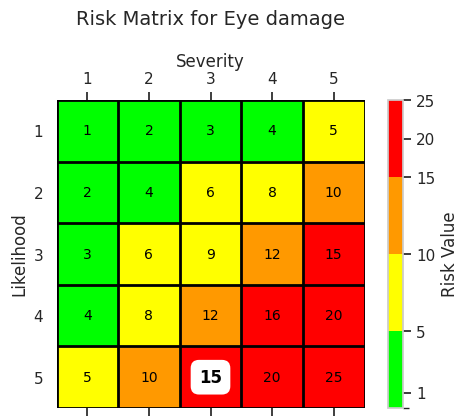

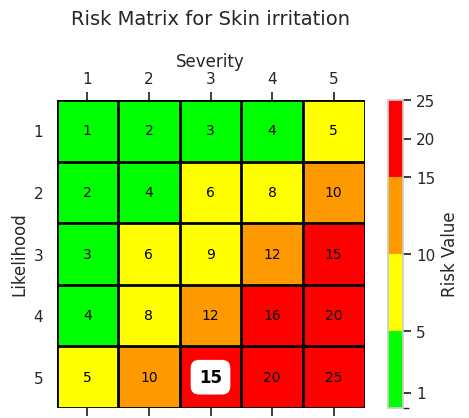

In [92]:
# Function to generate risk assessment prompt
def generate_risk_prompt(data, activity_name):
    # Filter and process data
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    mode_at_risk = activity_data['Identified at Risk'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s) &
        (activity_data['Identified at Risk'] == mode_at_risk)
    ]
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R using mode values
    unique_hazard_data['Initial Risk R'] = mode_risk_l * mode_risk_s
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the risk assessment document
    prompt = f"Generate a risk assessment document in markdown format for the activity '{activity_name}'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{mode_risk_l}, S{mode_risk_s}, R{row['Initial Risk R']}, Identified at risk: {row['Identified at Risk']}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt, unique_hazard_data, mode_risk_l, mode_risk_s

# Function to plot risk matrix for each hazard
def plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s):
    for index, row in hazard_data.iterrows():
        hazard = row['Hazard']
        initial_risk = row['Initial Risk R']
        likelihood = mode_risk_l
        severity = mode_risk_s

        # Define risk matrix dimensions
        likelihood_values = np.arange(1, 6)
        severity_values = np.arange(1, 6)
        risk_matrix = np.zeros((5, 5))

        # Fill the matrix with risk values
        for l in likelihood_values:
            for s in severity_values:
                risk_matrix[l-1, s-1] = l * s

        # Define the custom color map
        colors = ['#00FF00', '#FFFF00', '#FF9900', '#FF0000']  # green, yellow, orange, red
        cmap = mcolors.ListedColormap(colors)
        bounds = [0, 5, 10, 15, 25]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Plotting the risk matrix
        fig, ax = plt.subplots(figsize=(6, 4))
        cax = ax.matshow(risk_matrix, cmap=cmap, norm=norm)

        # Annotate cells with risk value and highlight the specified cell
        for i in range(5):
            for j in range(5):
                risk_value = int(risk_matrix[i, j])
                if (i+1 == likelihood) and (j+1 == severity):
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', weight='bold', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
                else:
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', fontsize=10)

        # Set labels
        ax.set_xticks(np.arange(5))
        ax.set_yticks(np.arange(5))
        ax.set_xticklabels(['1', '2', '3', '4', '5'])
        ax.set_yticklabels(['1', '2', '3', '4', '5'])
        ax.set_xlabel('Severity', fontsize=12)
        ax.set_ylabel('Likelihood', fontsize=12)
        ax.xaxis.set_label_position('top') 
        plt.title(f'Risk Matrix for {hazard}', fontsize=14, pad=20)
        plt.colorbar(cax, label='Risk Value', boundaries=bounds, ticks=[1, 5, 10, 15, 20, 25])

        # Remove grid lines
        ax.grid(False)

        # Add some stylistic elements
        ax.spines[:].set_visible(False)
        ax.set_xticks(np.arange(5+1)-.5, minor=True)
        ax.set_yticks(np.arange(5+1)-.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(which="minor", size=0)
        
        plt.show()
# Use the provided df_risk DataFrame
activity_name = 'Concreting'
prompt, hazard_data, mode_risk_l, mode_risk_s = generate_risk_prompt(df_risk, activity_name)
print(prompt)
plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s)

### 4.2 Generating Job Safety Analysis Document

#### claude-3-sonnet-20240229

#### Experiment 1: Defined Function Based Prompting

In [126]:
def get_claude_response(input_text, model=None):
    # Sets up the headers for the API request, including authorization and content type.
    headers = {
        'Authorization': api_key_anthropic,  # Use your Claude API key.
        'Content-Type': 'application/json'  # Specifies the request content format.
    }
    
    # Sets a default model if none is provided.
    if model is None:
        model = "claude-3-sonnet-20240229"  # Default model name, adjustable as needed.
    
    # Constructs the JSON payload for the API request.
    data = {
        "model": model,  # The AI model to use for the request.
        "max_tokens": 1024,  # Maximum number of tokens in the response.
        "messages": [
            {"role": "user", "content": input_text}  # The user message content for the AI to respond to.
        ]
    }
    
    # Sends the POST request to the Claude API endpoint.
    response = requests.post(api_url_anthropic, json=data, headers=headers)
    
    # Checks if the request was successful (HTTP status code 200).
    if response.status_code == 200:
        response_data = response.json()  # Parse the JSON response data.
        return extract_claude_message(response_data)  # Extract the AI's response message.
    else:
        # Returns a dictionary containing the error status code and message if the request fails.
        return {"statusCode": response.status_code, "body": response.content.decode('utf-8')}

def extract_claude_message(response_data):
    # Checks if 'content' exists in the response data and if it contains any messages.
    if 'content' in response_data and len(response_data['content']) > 0:
        # Returns the text of the first message in the content array.
        return response_data['content'][0]['text']
    else:
        # Returns an error message if 'content' is not found in the response data.
        return "Error: 'content' not found in response"

def display_message(response):
    # Checks if the response is a dictionary, which indicates an error occurred.
    if isinstance(response, dict):
        # Constructs an error message string from the dictionary contents.
        error_message = "Error " + str(response.get("statusCode", "")) + ": " + response.get("body", "")
        markdown_content = "---\n\n" + error_message + "\n\n---"  # Formats the error message in Markdown.
    else:
        # Formats the AI response message in Markdown.
        markdown_content = "---\n\n" + response + "\n\n---"

    # Displays the formatted Markdown content in a styled HTML div.
    display(Markdown("<div style='color: #34568B;'>\n\n" + markdown_content + "\n\n</div>"))



## Function to Generate JSA Document

In [96]:
def generate_jsa_prompt_from_df(df, activity_name, start_index, batch_size):
    # Filter DataFrame for a specific activity
    df_filtered = df[df['Activity'] == activity_name]
    # Groups the filtered DataFrame by 'Sub-Activity Name' to process data for each sub-activity separately.
    grouped = df_filtered.groupby('Sub-Activity Name')
    prompt_text = ""  # Initializes an empty string to accumulate the JSA content for each sub-activity.
    
    # Enumerates over each group, where 'i' is the index, 'name' is the sub-activity name, and 'group' is the DataFrame subset.
    for i, (name, group) in enumerate(grouped):
        if i < start_index:
            continue  # Skips groups until reaching the specified start index.
        if i >= start_index + batch_size:
            break  # Stops processing once the batch size limit is reached.

        # Extracts details from the group, converting unique values to strings and formatting them.
        sub_activity = name  # Current sub-activity name.
        hazard = ", ".join(map(str, group['Type Of Hazard'].unique()))  # Concatenates unique hazard types into a string.
        risks = ", ".join(map(str, group['Risk(s) Involved'].unique()))  # Concatenates unique risks into a string.
        measures = "\n".join(map(str, group['Risk Control measures'].unique()))  # Formats control measures with new lines.

        # Constructs a formatted text block for the current sub-activity's safety analysis.
        sub_activity_text = f"Sub-Activity: {sub_activity}\n"
        hazard_text = f"Type Of Hazard: {hazard}\n"
        risks_text = f"Risk(s) Involved: {risks}\n"
        measures_text = f"Risk Control measures:\n{measures}\n"
        
        # Appends the formatted text block to the overall prompt text.
        prompt_text += sub_activity_text + hazard_text + risks_text + measures_text + "\n\n"
    
    # Defines the full prompt including the main activity and all processed sub-activity details.
    full_prompt = f"Generate a Job Safety Analysis document for the following activity: {activity_name}.\n\n" + prompt_text
    return full_prompt  # Returns the complete formatted prompt for generating a JSA document.

#### Activity 1: Area Hard Barrication

In [97]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Area Hard barrication"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Here is the Job Safety Analysis (JSA) document for the activity of Area Hard Barrication:

Job Safety Analysis

Activity: Area Hard Barrication

Sub-Activity: Barrication
Type of Hazard: Fall of material  
Risk(s) Involved: Personal Injury
Risk Control Measures:
- Ensure inducted labor at the site
- Ensure sufficient manpower for carriage of material
- Ensure use of Full Body Safety Harness (FBSH) while barrication near the edge of the pit

Sub-Activity: Loading & Unloading  
Type of Hazard: Fall/Slip/Trip
Risk(s) Involved: Personal Injury
Risk Control Measures:
- Evaluate the capacity of the dumper
- Provision of banksman for guiding the process and stopper for vehicles
- Ensure level ground for unloading dumper at the dumping area
- Material stacking not less than 1.5 meters from the edge of the pit
- Ensure safe working height for stacking of the material (1.5 meters)

Sub-Activity: Manpower Mobilization
Type of Hazard: Untrained worker
Risk(s) Involved: Personal Injury, Breakdown
Risk Control Measures:
- Only inducted workers shall be deputed at the workplace
- Provide Tool Box Talk to all workers
- Ensure daily maintenance of the excavator

Sub-Activity: Material Transport
Type of Hazard: Road Accident
Risk(s) Involved: Personal Injury, Loss of Property
Risk Control Measures:
- Identify the route of the vehicle
- Check the competency of the vehicle driver
- Check the authorization papers of the driver & vehicle
- Confirm fitness of the vehicle (brakes, tail lamps, reverse horns)

Sub-Activity: Work During Dark Hours
Type of Hazard: Darkness, Fall of Person, Fall of Machinery
Risk(s) Involved: Personal Injury, Damage to Property
Risk Control Measures:
- Obtain a night work permit from the concerned engineering and safety department
- Ensure proper illumination during dark hours
- Electrical cables should be at least 2 meters in height; no exposed electrical wires; ensure earthing
- Illuminate the route

---

</div>

#### Activity 2: Anti-termite Treatment

In [98]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Anti-termite treatment"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis (JSA) for Anti-Termite Treatment

Sub-Activity: Anti-Termite Treatment

Potential Hazards:
1. Toxic Material
2. Dermatitis

Risks Involved:
1. Inhalation of toxic fumes
2. Injection (accidental piercing of the skin)
3. Eye irritation
4. Skin irritation

Risk Control Measures:
1. Use of all required Personal Protective Equipment (PPE) such as respirators, goggles, chemical-resistant gloves, and protective clothing.
2. Material Safety Data Sheets (MSDS) for the chemicals used shall be made available at the site.
3. Follow safe handling and use procedures for the chemicals as per the MSDS and manufacturer's instructions.
4. Thoroughly wash hands and any other body parts exposed to chemicals before eating, drinking, or after completing work.
5. Obtain a Work Permit prior to the activity, ensuring all necessary precautions are in place.
6. Store chemicals in a designated, secure storage area with restricted entry and proper inventory management.

Sub-Activity: Manpower Mobilization

Potential Hazards:
1. Untrained workers
2. Lack of skill awareness

Risks Involved:
1. Personal injury

Risk Control Measures:
1. Deploy only inducted and trained workers at the workplace.
2. Conduct Tool Box Talks (TBT) for all workers, covering safety procedures, hazard awareness, and proper use of PPE.

---

</div>

#### Activity 3: Alluminium Door Fixing

In [99]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Alluminium door fixing"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis (JSA) Document

Activity: Aluminum Door Fixing

Sub-Activity: Fixing of Frame
Type of Hazard: Fall of material, fall of man, electric shock, fall of equipment
Risk(s) Involved: Personal Injury, property damage
Risk Control Measures:
- Ensure only inspected ladders or scaffolds are used for work.
- Ensure only inspected portable equipment is used for work.
- Ensure safety harnesses (Full Body Safety Harness) are used above 2 meters height.
- Ensure tools and materials are secured with ropes at height (work platform).
- Ensure no one stands below a load.

Sub-Activity: Manpower Mobilization
Type of Hazard: Untrained workers
Risk(s) Involved: Personal injury
Risk Control Measures:
- Only inducted (trained) workers shall be deployed at the workplace.
- Provide Tool Box Talks to all workers.
- Obtain required work permits before starting the activity.
- Work shall be carried out under continuous supervision.

Sub-Activity: Work during Dark Hours
Type of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property
Risk Control Measures:
- Obtain a night work permit from the concerned engineering and safety department.
- Ensure personnel can safely carry the required weight.
- Electrical cables should be routed at a minimum height of 2 meters. No exposed electrical wires. Ensure proper earthing.
- Ensure the work route is adequately illuminated.

Please note that this JSA document is based on the information provided, and it should be reviewed and updated as necessary to ensure the safety of workers and the workplace.

---

</div>

#### Activity 4: Column Shuttering

In [101]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Column Shuttering"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Here is a Job Safety Analysis document for the activity of Column Shuttering:

Job Safety Analysis: Column Shuttering

Sub-Activity: Manpower Mobilization
Type of Hazard: Untrained worker, lack of skill awareness  
Risk(s) Involved: Personal injury
Risk Control Measures:
- Only inducted workers shall be deputed at the workplace.
- Provide Tool Box Talk to all workers.

Sub-Activity: Shuttering  
Type of Hazard: Fall of material/collapse of shuttering, trip/fall of personnel, nail piercing
Risk(s) Involved: Injury/property damage, personnel injury/fatal, personnel injury  
Risk Control Measures:
- Use of basic PPE (hard hats, safety shoes, gloves, etc.)
- Thoroughly inspect steel frame staging before erection.
- Maintain proper housekeeping/stacking of materials in an isolated area.
- Construct tubular steel scaffolds/staging as per the approved scheme.
- Work shall be carried out by competent personnel under proper supervision.
- Ensure struts and diagonal braces are in proper position and secured.
- Use sufficient workers when lifting/placing shutter boards to avoid falling materials.
- Provide full body safety harnesses for laborers working on scaffolds.  
- Support scaffolds properly to avoid overturning.
- Remove loose nails from the site and bend over protruding nails.
- Inspect timber jacks, joists, stringers and ledgers for defects like cracks/knots.

Sub-Activity: Staging
Type of Hazard: Fall of person, material
Risk(s) Involved: Personal injury  
Risk Control Measures:  
- Barricade the area to restrict entry.
- Ensure each worker uses a full body safety harness with anchor points.
- Check cuplock verticals for bending and breakages.  
- Place ledgers every 500mm and cover them with cups.
- Maintain good housekeeping at the work site.

Sub-Activity: Work during dark hours
Type of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property
Risk Control Measures:
- Obtain night work permit from concerned engineering and safety department.  
- Ensure proper illumination during dark hours.
- Electrical cables should be routed at least 2m high with no exposed wires. Provide earthing.
- Illuminate routes and work areas.

---

</div>

#### Activity 5: Rebaring

In [102]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Rebaring"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis (JSA) for Rebaring Activity

Sub-Activity: Drilling of holes on column

Type of Hazard: Fall of material, Fall of person
Risk(s) Involved: Personal injury

Risk Control Measures:
1. Ensure safe scaffolding, e.g., proper access, working platform with mid-rail, top rail with support.
2. Ensure the drilling machine is inspected, and the cable and industrial pin top are damage-free.
3. Ensure workers working at height wear a full body harness.
4. Ensure tools and other materials on the working platform are securely bound.
5. Ensure the use of inspected tools and tackles.

Sub-Activity: Manpower Mobilization

Type of Hazard: Untrained worker
Risk(s) Involved: Personal injury

Risk Control Measures:
1. Only inducted workers shall be deployed at the workplace.
2. Provide Tool Box Talk to all workers.

Sub-Activity: Work during dark hours

Type of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property

Risk Control Measures:
1. Obtain a night work permit from the concerned engineering and safety department.
2. Ensure proper illumination during dark hours.
3. Electrical cables should be routed at a minimum height of 2 meters. No exposed electrical wires. Ensure proper earthing.
4. Ensure the route is illuminated.

Additional Precautions:
1. Ensure all workers are wearing appropriate personal protective equipment (PPE) such as hard hats, safety shoes, gloves, and eye protection.
2. Establish a designated safe zone and restrict access to unauthorized personnel.
3. Conduct regular inspections of the work area, tools, and equipment to identify and address potential hazards.
4. Implement proper housekeeping practices to maintain a clean and organized work environment.
5. Provide adequate first-aid facilities and trained personnel at the worksite.
6. Ensure effective communication channels and emergency response procedures are in place.

Note: This JSA is a general guideline, and it is essential to review and modify it according to the specific project requirements, site conditions, and applicable local regulations.

---

</div>

#### Experiment 2: Defined Function with Instructions

In [127]:
def generate_jsa_prompt_from_df(df, activity_name, start_index, batch_size):
    # Filter the DataFrame to include only rows corresponding to the specified activity.
    df_filtered = df[df['Activity'] == activity_name]
    
    # Group the filtered DataFrame by 'Sub-Activity Name' to organize data for each sub-activity.
    grouped = df_filtered.groupby('Sub-Activity Name')
    
    # Initialize an empty string to accumulate the formatted text for the JSA content.
    prompt_text = ""
    
    # Enumerate over each group, where 'i' is the index, 'name' is the sub-activity name, and 'group' is the DataFrame subset.
    for i, (name, group) in enumerate(grouped):
        if i < start_index:
            continue  # Skip groups until reaching the specified starting index.
        if i >= start_index + batch_size:
            break  # Stop processing after reaching the specified batch size.

        # Extract and format unique details from the group into strings.
        sub_activity = name  # Current sub-activity name.
        hazard = ", ".join(map(str, group['Type Of Hazard'].unique()))  # Join unique hazard types into a single string.
        risks = ", ".join(map(str, group['Risk(s) Involved'].unique()))  # Join unique risks into a single string.
        measures = "\n".join(map(str, group['Risk Control measures'].unique()))  # Format control measures with new lines.

        # Construct a formatted text block for the current sub-activity's safety analysis content.
        sub_activity_text = f"Sub-Activity: {sub_activity}\n"
        hazard_text = f"Type Of Hazard: {hazard}\n"
        risks_text = f"Risk(s) Involved: {risks}\n"
        measures_text = f"Risk Control measures:\n{measures}\n"
        
        # Append the formatted text block to the overall prompt text.
        prompt_text += sub_activity_text + hazard_text + risks_text + measures_text + "\n\n"
    
    # Construct the full prompt with a header specifying the activity and instructions to focus on dataset details.
    full_prompt = (f"Generate a Job Safety Analysis document for the following activity: {activity_name}.\n\n" +
                  "Focus on the following details without adding any other additional information such as introductions, recommendations, or meanings. Only include details from the dataset provided:\n" +
                  prompt_text)
    
    return full_prompt  # Return the complete, formatted prompt for generating a JSA document.

#### Activity 1: Area Hard Barrication

In [104]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Area Hard barrication"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis Document:

Sub-Activity: Barrication
Type Of Hazard: Fall of material
Risk(s) Involved: Personal Injury
Risk Control measures:
- Ensure inducted labour at site
- Ensure sufficient manpower for carriage of material
- Ensure use of FBSH while barrication near edge of the pit

Sub-Activity: Loading & unloading 
Type Of Hazard: Fall/Slip/Trip
Risk(s) Involved: Personal injury
Risk Control measures:
- Evaluating the capacity of the dumper
- Provision of banks man for guiding the process and stopper for vehicle
- Ensuring the level ground for unloading dumper at dumping area
- Material stacking not less than 1.5 mtrs from the edge of the pit
- Ensuring safe working height for stacking of the material (1.5 mtrs)

Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained worker  
Risk(s) Involved: Personal injury, Break down
Risk Control measures:
- Only inducted worker shall be deputed at the work place
- Given Tool Box Talk to all workers
- Ensure daily maintenance of excavator

Sub-Activity: Material transports
Type Of Hazard: Road accident
Risk(s) Involved: Personal injury, loss of property
Risk Control measures:
- Identifying the route of the vehicle
- Checking the competency of the vehicle driver
- Checking of authorization papers of driver & vehicle
- Confirming fitness of the vehicle- viz. breaks, tale lamps, reverse horns

Sub-Activity: Work during dark hours
Type Of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property  
Risk Control measures:
- Night work permit to be taken from concern engg.and safety dept.
- Ensure proper illumination during dark hours
- Electrical cable should lead min 2 m height. No exposed electrical wire. Earthing
- Route shall be illuminated

---

</div>

#### Activity 2: Anti-Termite Treatment

In [105]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Anti-termite treatment"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis

Sub-Activity: Anti-Termite Treatment
Type Of Hazard: Toxic Material, Dermitites
Risk(s) Involved: Inhaling, Injecting, Eye irritation, Skin irritation
Risk Control Measures: 
- Use of all required PPE's
- MSDS shall be made available at the site
- Work shall be carried out as per safe use of chemical
- Thoroughly wash the hands and other body parts exposed to chemicals before eating food/after completion of work
- Work Permit shall be taken prior to the activity
- Chemicals shall be stored in a dedicated storage area with restricted entry and properly accounted for

Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained workers, lack of skill awareness
Risk(s) Involved: Personal injury
Risk Control Measures:
- Only inducted workers shall be deputed at the workplace
- Provide Tool Box Talk to all workers

---

</div>

#### Activity 3: Alluminium Door Fixing

In [106]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Alluminium door fixing"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis for Aluminium Door Fixing

Sub-Activity: Fixing of Frame
Type Of Hazard: Fall of material, fall of man, electric shock, fall of equipment
Risk(s) Involved: Personal Injury, property damage
Risk Control measures:
- Ensure only inspected ladder/ scaffold should use for work
- Ensure only inspected portable equipments should use for work
- Ensure safety belt(FBSH) above 2 mtr. Height
- Ensure tools and material should fix with rope at height (work platform)
- Ensure person should not stand below load

Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained worker
Risk(s) Involved: Personal injury
Risk Control measures:
- Only inducted worker shall be deputed at the work place.
- Given Tool Box Talk to all workers.
- Required work permits should be taken before start of activity
- Work Shall be carried out under continuous Supervision.

Sub-Activity: Work during dark hours
Type Of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property
Risk Control measures:
- Night work permit to be taken from concern engg.and safety dept.
- Ensure person can carry weight
- Electrical cable should lead min 2 m height. No exposed electrical wire.Earthing.
- Route shall be illuminated.

---

</div>

#### Activity 4: Column Shuttering

In [107]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Column Shuttering"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis - Column Shuttering

Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained worker, lack of skill awareness
Risk(s) Involved: Personal injury
Risk Control Measures:
- Only inducted worker shall be deputed at the work place.
- Given Tool Box Talk to all workers.

Sub-Activity: Shuttering  
Type Of Hazard: Fall of material / Collapse of shuttering, Trip / fall of personnel, Nail Piercing
Risk(s) Involved: Injury/property damage, Personnel injury / fatal, Personnel injury
Risk Control Measures:
- Use of Basic PPE
- Before erection of steel frame staging is started, a through inspection should be undertaken on it.
- Proper housekeeping/stacking of material in an isolated area.
- Tubular steel scaffolds / staging to be made as per the scheme.
- Work shall be carried out by competent person under proper supervision of foremen / incharge.
- Struts and diagonal brace must be in proper position and secured for frames to develop full load carrying capacity.
- Lifting of shutter boards & placing in position shall be done by sufficient nos of workers to avoid fall of material.
- Labours standing on scaffolds hall be given FBSH.
- Scaffolds shall be supported to avoid overturning.
- Loose nail should be removed from site & nails which have came out of ply shall also be bent or removed.
- Timber jacks, joists, stringers and ledgers should be inspected for defects such as cracks / excessive knots.

Sub-Activity: Staging
Type Of Hazard: Fall of person, material
Risk(s) Involved: Personal Injury
Risk Control Measures:  
- Area barricade to restrict entry.
- Ensure (FBSH) full body safety harness anchor by each workmen.
- Cuplock verticals are checked against bending & breakages
- Ledgers shall be placed at every 500mm & same shall be covered with the cups.
- Maintain good house keeping at work site.

Sub-Activity: Work during dark hours
Type Of Hazard: Darkness, fall of person, fall of machinery  
Risk(s) Involved: Personal injury, damage to property
Risk Control Measures:
- Night work permit to be taken from concern engg.and safety dept.  
- Ensure proper illumination during dark hours.
- Electrical cable should lead min 2 m height. No exposed electrical wire. Earthing.
- Route shall be illuminated.

---

</div>

#### Activity 5: Rebaring

In [108]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Rebaring"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis - Rebaring

Sub-Activity: Drilling of holes on column
Type Of Hazard: Fall of material, Fall of person
Risk(s) Involved: Personal injury
Risk Control measures:
- Ensure safe scaffolding e.g. access, working platform with mid rail, top rail with support
- Ensure drilling machine should be inspected with damage-free cable and industrial pin top
- Ensure worker working on height with Full body harness
- Ensure tools and other material on working platform should be bound
- Ensure use of inspected tools & tackles

Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained worker
Risk(s) Involved: Personal injury
Risk Control measures:
- Only inducted worker shall be deputed at the work place.
- Give Tool Box Talk to all workers.

Sub-Activity: Work during dark hours
Type Of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property
Risk Control measures:
- Night work permit to be taken from concerned engineering and safety department.
- Ensure proper illumination during dark hours.
- Electrical cable should be led minimum 2 meters height. No exposed electrical wire. Earthing.
- Route shall be illuminated.

---

</div>

### claude-3-opus-20240229

#### Experiment 1: Defined Function Based Prompting

In [128]:
def get_claude_response(input_text, model=None):
    # Sets up the headers for the API request, including authorization and content type.
    headers = {
        'Authorization': api_key_anthropic,  # Use your Claude API key.
        'Content-Type': 'application/json'  # Specifies the request content format.
    }
    
    # Sets a default model if none is provided.
    if model is None:
        model = "claude-3-opus-20240229"  # Default model name, adjustable as needed.
    
    # Constructs the JSON payload for the API request.
    data = {
        "model": model,  # The AI model to use for the request.
        "max_tokens": 1024,  # Maximum number of tokens in the response.
        "messages": [
            {"role": "user", "content": input_text}  # The user message content for the AI to respond to.
        ]
    }
    
    # Sends the POST request to the Claude API endpoint.
    response = requests.post(api_url_anthropic, json=data, headers=headers)
    
    # Checks if the request was successful (HTTP status code 200).
    if response.status_code == 200:
        response_data = response.json()  # Parse the JSON response data.
        return extract_claude_message(response_data)  # Extract the AI's response message.
    else:
        # Returns a dictionary containing the error status code and message if the request fails.
        return {"statusCode": response.status_code, "body": response.content.decode('utf-8')}

def extract_claude_message(response_data):
    # Checks if 'content' exists in the response data and if it contains any messages.
    if 'content' in response_data and len(response_data['content']) > 0:
        # Returns the text of the first message in the content array.
        return response_data['content'][0]['text']
    else:
        # Returns an error message if 'content' is not found in the response data.
        return "Error: 'content' not found in response"

def display_message(response):
    # Checks if the response is a dictionary, which indicates an error occurred.
    if isinstance(response, dict):
        # Constructs an error message string from the dictionary contents.
        error_message = "Error " + str(response.get("statusCode", "")) + ": " + response.get("body", "")
        markdown_content = "---\n\n" + error_message + "\n\n---"  # Formats the error message in Markdown.
    else:
        # Formats the AI response message in Markdown.
        markdown_content = "---\n\n" + response + "\n\n---"

    # Displays the formatted Markdown content in a styled HTML div.
    display(Markdown("<div style='color: #34568B;'>\n\n" + markdown_content + "\n\n</div>"))



## Function to Generate JSA Document

In [129]:
def generate_jsa_prompt_from_df(df, activity_name, start_index, batch_size):
    # Filter DataFrame for a specific activity
    df_filtered = df[df['Activity'] == activity_name]
    # Groups the filtered DataFrame by 'Sub-Activity Name' to process data for each sub-activity separately.
    grouped = df_filtered.groupby('Sub-Activity Name')
    prompt_text = ""  # Initializes an empty string to accumulate the JSA content for each sub-activity.
    
    # Enumerates over each group, where 'i' is the index, 'name' is the sub-activity name, and 'group' is the DataFrame subset.
    for i, (name, group) in enumerate(grouped):
        if i < start_index:
            continue  # Skips groups until reaching the specified start index.
        if i >= start_index + batch_size:
            break  # Stops processing once the batch size limit is reached.

        # Extracts details from the group, converting unique values to strings and formatting them.
        sub_activity = name  # Current sub-activity name.
        hazard = ", ".join(map(str, group['Type Of Hazard'].unique()))  # Concatenates unique hazard types into a string.
        risks = ", ".join(map(str, group['Risk(s) Involved'].unique()))  # Concatenates unique risks into a string.
        measures = "\n".join(map(str, group['Risk Control measures'].unique()))  # Formats control measures with new lines.

        # Constructs a formatted text block for the current sub-activity's safety analysis.
        sub_activity_text = f"Sub-Activity: {sub_activity}\n"
        hazard_text = f"Type Of Hazard: {hazard}\n"
        risks_text = f"Risk(s) Involved: {risks}\n"
        measures_text = f"Risk Control measures:\n{measures}\n"
        
        # Appends the formatted text block to the overall prompt text.
        prompt_text += sub_activity_text + hazard_text + risks_text + measures_text + "\n\n"
    
    # Defines the full prompt including the main activity and all processed sub-activity details.
    full_prompt = f"Generate a Job Safety Analysis document for the following activity: {activity_name}.\n\n" + prompt_text
    return full_prompt  # Returns the complete formatted prompt for generating a JSA document.

#### Activity 1: Area Hard Barrication

In [114]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Area Hard barrication"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis (JSA) Document
Activity: Area Hard Barrication

1. Sub-Activity: Barrication
   Type of Hazard: Fall of material
   Risk(s) Involved: Personal Injury
   Risk Control Measures:
   - Ensure inducted labour at site
   - Ensure sufficient manpower for carriage of material
   - Ensure use of Fall Body Safety Harness (FBSH) while barrication near edge of the pit

2. Sub-Activity: Loading & Unloading
   Type of Hazard: Fall/Slip/Trip
   Risk(s) Involved: Personal injury
   Risk Control Measures:
   - Evaluate the capacity of the dumper
   - Provide a banks man for guiding the process and stopper for the vehicle
   - Ensure level ground for unloading dumper at dumping area
   - Material stacking should not be less than 1.5 meters from the edge of the pit
   - Ensure safe working height for stacking of the material (1.5 meters)

3. Sub-Activity: Manpower Mobilization
   Type of Hazard: Untrained worker
   Risk(s) Involved: Personal injury, Break down
   Risk Control Measures:
   - Only inducted workers shall be deputed at the workplace
   - Provide Tool Box Talk to all workers
   - Ensure daily maintenance of excavator

4. Sub-Activity: Material Transport
   Type of Hazard: Road accident
   Risk(s) Involved: Personal injury, loss of property
   Risk Control Measures:
   - Identify the route of the vehicle
   - Check the competency of the vehicle driver
   - Check authorization papers of driver & vehicle
   - Confirm fitness of the vehicle (brakes, tail lamps, reverse horns)

5. Sub-Activity: Work During Dark Hours
   Type of Hazard: Darkness, fall of person, fall of machinery
   Risk(s) Involved: Personal injury, damage to property
   Risk Control Measures:
   - Obtain night work permit from concerned engineering and safety department
   - Ensure proper illumination during dark hours
   - Electrical cables should be at a minimum height of 2 meters with no exposed electrical wires and proper earthing
   - Illuminate the route

By following the above risk control measures for each sub-activity, the overall risk associated with the area hard barrication activity can be minimized, ensuring a safer working environment for all personnel involved.

---

</div>

#### Activity 2: Anti-Termite Treatment

In [115]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Anti-termite treatment"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis (JSA) - Anti-Termite Treatment

1. Sub-Activity: Anti-Termite Treatment
   Type of Hazard: Toxic Material, Dermatitis
   Risk(s) Involved: Inhalation, Injection, Eye irritation, Skin irritation
   Risk Control Measures:
   - Use all required Personal Protective Equipment (PPE) such as respirators, gloves, safety glasses, and protective clothing.
   - Material Safety Data Sheets (MSDS) shall be made available at the site for reference.
   - Work shall be carried out as per safe use of chemicals guidelines.
   - Thoroughly wash hands and other exposed body parts before eating or after completion of work.
   - Obtain a Work Permit prior to starting the activity.
   - Store chemicals in a designated godown with restricted entry and maintain proper inventory records.

2. Sub-Activity: Manpower Mobilization
   Type of Hazard: Untrained workers, lack of skill awareness
   Risk(s) Involved: Personal injury
   Risk Control Measures:
   - Only deploy inducted workers at the workplace.
   - Conduct Tool Box Talks for all workers to raise awareness about safety procedures and precautions.

3. Sub-Activity: Handling and Application of Anti-Termite Chemicals
   Type of Hazard: Spillage, Improper application
   Risk(s) Involved: Environmental contamination, Ineffective treatment
   Risk Control Measures:
   - Train workers on proper handling and application techniques for anti-termite chemicals.
   - Ensure the use of appropriate tools and equipment for chemical application.
   - Provide spill containment kits and train workers on spill response procedures.
   - Supervise the application process to ensure adherence to manufacturer's instructions and safety guidelines.

4. Sub-Activity: Disposal of Chemical Containers and Waste
   Type of Hazard: Improper disposal
   Risk(s) Involved: Environmental pollution, Health hazards
   Risk Control Measures:
   - Follow local regulations and guidelines for the proper disposal of chemical containers and waste.
   - Store empty containers and waste materials in designated areas away from water sources and public access.
   - Arrange for authorized waste disposal contractors to collect and dispose of the waste safely.

5. Sub-Activity: Post-Treatment Monitoring
   Type of Hazard: Residual chemicals
   Risk(s) Involved: Exposure to treated areas
   Risk Control Measures:
   - Inform occupants about the treated areas and advise them to avoid contact until the specified safe re-entry time.
   - Display warning signs in treated areas to prevent unauthorized access.
   - Conduct post-treatment monitoring to ensure the effectiveness of the anti-termite treatment and the absence of any adverse effects on human health or the environment.

Note: This JSA serves as a general guideline and should be adapted to the specific requirements and regulations of the local jurisdiction and the anti-termite treatment product being used. Always consult the product label, MSDS, and relevant safety regulations before conducting anti-termite treatment.

---

</div>

#### Activity 3: Alluminium Door Fixing

In [116]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Alluminium door fixing"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis (JSA) Document
Activity: Aluminum Door Fixing

1. Sub-Activity: Fixing of Frame
   Type of Hazard: Fall of material, fall of man, electric shock, fall of equipment
   Risk(s) Involved: Personal injury, property damage
   Risk Control Measures:
   - Ensure only inspected ladder/scaffold is used for work
   - Ensure only inspected portable equipment is used for work
   - Ensure safety belt (FBSH) is used above 2 meters height
   - Ensure tools and materials are fixed with rope at height (work platform)
   - Ensure no person stands below the load

2. Sub-Activity: Manpower Mobilization
   Type of Hazard: Untrained worker
   Risk(s) Involved: Personal injury
   Risk Control Measures:
   - Only inducted workers shall be deputed at the workplace
   - Provide Tool Box Talk to all workers
   - Required work permits should be obtained before starting the activity
   - Work shall be carried out under continuous supervision

3. Sub-Activity: Work during dark hours
   Type of Hazard: Darkness, fall of person, fall of machinery
   Risk(s) Involved: Personal injury, damage to property
   Risk Control Measures:
   - Night work permit to be obtained from concerned engineering and safety departments
   - Ensure the person can carry weight
   - Electrical cables should be at a minimum height of 2 meters, with no exposed electrical wires and proper earthing
   - Route shall be adequately illuminated

Additional Recommendations:
- Conduct regular safety training and awareness programs for workers
- Ensure the availability and proper use of personal protective equipment (PPE)
- Maintain a clean and organized work area to minimize tripping and falling hazards
- Regularly inspect and maintain all tools, equipment, and machinery
- Establish clear communication channels among workers and supervisors
- Conduct regular safety audits and implement corrective actions as needed
- Ensure compliance with all relevant safety regulations and guidelines

By following this Job Safety Analysis document and implementing the recommended risk control measures, the risks associated with aluminum door fixing can be minimized, ensuring a safer working environment for all involved personnel.

---

</div>

#### Activity 4: Column Shuttering

In [117]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Column Shuttering"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis: Column Shuttering

Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained worker, lack of skill awareness
Risk(s) Involved: Personal injury
Risk Control measures:
1. Only inducted workers shall be deputed at the workplace.
2. Provide Tool Box Talk to all workers.

Sub-Activity: Shuttering
Type Of Hazard: Fall of material / Collapse of shuttering, Trip / fall of personnel, Nail Piercing
Risk(s) Involved: Injury/property damage, Personnel injury / fatal, Personnel injury
Risk Control measures:
1. Use of Basic PPE.
2. Before erection of steel frame staging, a thorough inspection should be undertaken.
3. Proper housekeeping/stacking of material in an isolated area.
4. Tubular steel scaffolds / staging to be made as per the scheme.
5. Work shall be carried out by competent persons under proper supervision of foremen / in-charge.
6. Struts and diagonal braces must be in proper position and secured for frames to develop full load-carrying capacity.
7. Lifting of shutter boards & placing in position shall be done by a sufficient number of workers to avoid fall of material.
8. Labourers standing on scaffolds shall be given FBSH (Full Body Safety Harness).
9. Scaffolds shall be supported to avoid overturning.
10. Loose nails should be removed from the site & nails which have come out of plywood shall also be bent or removed.
11. Timber jacks, joists, stringers, and ledgers should be inspected for defects such as cracks / excessive knots.

Sub-Activity: Staging
Type Of Hazard: Fall of person, material
Risk(s) Involved: Personal Injury
Risk Control measures:
1. Area barricade to restrict entry.
2. Ensure (FBSH) full body safety harness anchor by each workman.
3. Cuplock verticals are checked against bending & breakages.
4. Ledgers shall be placed at every 500mm & the same shall be covered with the cups.
5. Maintain good housekeeping at the work site.

Sub-Activity: Work during dark hours
Type Of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property
Risk Control measures:
1. Night work permit to be taken from concerned engineering and safety departments.
2. Ensure proper illumination during dark hours.
3. Electrical cables should lead to a minimum of 2 m height. No exposed electrical wire. Earthing.
4. Route shall be illuminated.

---

</div>

#### Activity 5: Rebaring

In [118]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Rebaring"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis (JSA)
Activity: Rebaring

Sub-Activity: Drilling of holes on column
Type Of Hazard: Fall of material, Fall of person
Risk(s) Involved: Personal injury
Risk Control measures:
1. Ensure safe scaffolding, including proper access, working platform with mid rail, and top rail with support.
2. Ensure drilling machine is inspected and has a damage-free cable and industrial pin top.
3. Ensure workers working at height are wearing full body harnesses.
4. Ensure tools and other materials on the working platform are properly secured.
5. Ensure the use of inspected tools and tackles.

Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained worker
Risk(s) Involved: Personal injury
Risk Control measures:
1. Only inducted workers shall be deputed at the workplace.
2. Provide Tool Box Talk to all workers.

Sub-Activity: Work during dark hours
Type Of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property
Risk Control measures:
1. Obtain a night work permit from the concerned engineering and safety departments.
2. Ensure proper illumination during dark hours.
3. Electrical cables should be positioned at a minimum height of 2 meters. No exposed electrical wires. Ensure proper earthing.
4. The route shall be adequately illuminated.

Additional Recommendations:
1. Conduct regular safety training and toolbox meetings to reinforce safety protocols and procedures.
2. Ensure all workers are provided with appropriate personal protective equipment (PPE) and are trained in its proper use.
3. Implement a system for regular inspection and maintenance of all tools, equipment, and scaffolding.
4. Establish clear communication channels between workers and supervisors to report any safety concerns or hazards immediately.
5. Develop and implement an emergency response plan, including procedures for evacuating the worksite in case of an accident or incident.

By following these risk control measures and additional recommendations, the risks associated with the rebaring activity can be minimized, ensuring a safer working environment for all personnel involved.

---

</div>

#### Experiment 2: Defined Function with Instructions

In [130]:
def generate_jsa_prompt_from_df(df, activity_name, start_index, batch_size):
    # Filter the DataFrame to include only rows corresponding to the specified activity.
    df_filtered = df[df['Activity'] == activity_name]
    
    # Group the filtered DataFrame by 'Sub-Activity Name' to organize data for each sub-activity.
    grouped = df_filtered.groupby('Sub-Activity Name')
    
    # Initialize an empty string to accumulate the formatted text for the JSA content.
    prompt_text = ""
    
    # Enumerate over each group, where 'i' is the index, 'name' is the sub-activity name, and 'group' is the DataFrame subset.
    for i, (name, group) in enumerate(grouped):
        if i < start_index:
            continue  # Skip groups until reaching the specified starting index.
        if i >= start_index + batch_size:
            break  # Stop processing after reaching the specified batch size.

        # Extract and format unique details from the group into strings.
        sub_activity = name  # Current sub-activity name.
        hazard = ", ".join(map(str, group['Type Of Hazard'].unique()))  # Join unique hazard types into a single string.
        risks = ", ".join(map(str, group['Risk(s) Involved'].unique()))  # Join unique risks into a single string.
        measures = "\n".join(map(str, group['Risk Control measures'].unique()))  # Format control measures with new lines.

        # Construct a formatted text block for the current sub-activity's safety analysis content.
        sub_activity_text = f"Sub-Activity: {sub_activity}\n"
        hazard_text = f"Type Of Hazard: {hazard}\n"
        risks_text = f"Risk(s) Involved: {risks}\n"
        measures_text = f"Risk Control measures:\n{measures}\n"
        
        # Append the formatted text block to the overall prompt text.
        prompt_text += sub_activity_text + hazard_text + risks_text + measures_text + "\n\n"
    
    # Construct the full prompt with a header specifying the activity and instructions to focus on dataset details.
    full_prompt = (f"Generate a Job Safety Analysis document for the following activity: {activity_name}.\n\n" +
                  "Focus on the following details without adding any other additional information such as introductions, recommendations, or meanings. Only include details from the dataset provided:\n" +
                  prompt_text)
    
    return full_prompt  # Return the complete, formatted prompt for generating a JSA document.

#### Activity 1: Area Hard Barrication

In [121]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Area Hard barrication"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis: Area Hard Barrication

Sub-Activity: Barrication 
Type Of Hazard: Fall of material
Risk(s) Involved: Personal Injury
Risk Control measures:
- Ensure inducted labour at site
- Ensure sufficient manpower for carriage of material
- Ensure use of FBSH while barrication near edge of the pit

Sub-Activity: Loading & unloading
Type Of Hazard: Fall/Slip/Trip
Risk(s) Involved: Personal injury
Risk Control measures:
- Evaluating the capacity of the dumper
- Provision of banks man for guiding the process and stopper for vehicle
- Ensuring the level ground for unloading dumper at dumping area
- Material stacking not less than 1.5 mtrs from the edge of the pit
- Ensuring safe working height for stacking of the material (1.5 mtrs)

Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained worker
Risk(s) Involved: Personal injury, Break down
Risk Control measures:
- Only inducted worker shall be deputed at the work place
- Given Tool Box Talk to all workers
- Ensure daily maintance of excavator

Sub-Activity: Material transports
Type Of Hazard: Road accident
Risk(s) Involved: Personal injury, loss of properly
Risk Control measures:
- Identifying the route of the vehicle
- Checking the competency of the vehicle driver
- Checking of authorization papers of driver & vehicle
- Confirming fitness of the vehicle- viz. breaks, tale lamps, reverse horns

Sub-Activity: Work during dark hours
Type Of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property
Risk Control measures:
- Night work permit to be taken from concern engg.and safety dept.
- Ensure proper illumination during dark hours
- Electrical cable should lead min 2 m height. No exposed electrical wire. Earthing.
- Route shall be illuminated

---

</div>

#### Activity 2: Anti-Termite Treatment

In [122]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Anti-termite treatment"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis: Anti-Termite Treatment

Sub-Activity: Anti-Termite Treatment
Type Of Hazard: Toxic Material, Dermitites
Risk(s) Involved: Inhaling, Injecting, Eye irritation, Skin irritation
Risk Control measures:
1. Use of all required PPE's.
2. MSDS shall be made available at the site.
3. Work shall be carried out as per safe use of chemical.
4. Thoroughly wash the hand and other body parts exposed to chemical before intaking the food/ after completion of work.
5. Work Permit shall be taken prior to the activity.
6. Chemical shall be stored in godown with restricted entry and properly accounted.

Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained worker, lack of skill awareness
Risk(s) Involved: Personal injury
Risk Control measures:
1. Only inducted worker shall be deputed at the work place.
2. Given Tool Box Talk to all workers.

---

</div>

#### Activity 3: Alluminium Door Fixing

In [123]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Alluminium door fixing"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis - Aluminium Door Fixing

Sub-Activity: Fixing of Frame
Type Of Hazard: Fall of material, fall of man, electric shock, fall of equipment
Risk(s) Involved: Personal Injury, property damage
Risk Control measures:
- Ensure only inspected ladder/ scaffold should use for work
- Ensure only inspected portable equipments should use for work
- Ensure safety belt(FBSH) above 2 mtr. Height
- Ensure tools and material should fix with rope at height (work platform)
- Ensure person should not stand below load

Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained worker
Risk(s) Involved: Personal injury
Risk Control measures:
- Only inducted worker shall be deputed at the work place.
- Given Tool Box Talk to all workers.
- Required work permits should be taken before start of activity
- Work Shall be carried out under continuous Supervision.

Sub-Activity: Work during dark hours
Type Of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property
Risk Control measures:
- Night work permit to be taken from concern engg.and safety dept.
- Ensure person can carry weight
- Electrical cable should lead min 2 m height. No exposed electrical wire.Earthing.
- Route shall be illuminated.

---

</div>

#### Activity 4: Column Shuttering

In [124]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Column Shuttering"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis: Column Shuttering

Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained worker, lack of skill awareness
Risk(s) Involved: Personal injury
Risk Control measures:
- Only inducted worker shall be deputed at the work place.
- Given Tool Box Talk to all workers.

Sub-Activity: Shuttering
Type Of Hazard: Fall of material / Collapse of shuttering, Trip / fall of personnel, Nail Piercing
Risk(s) Involved: Injury/property damage, Personnel injury / fatal, Personnel injury
Risk Control measures:
- Use of Basic PPE
- Before erection of steel frame staging is started, a through inspection should be undertaken on it.
- Proper housekeeping/stacking of material in an isolated area.
- Tubular steel scaffolds / staging to be made as per the scheme.
- Work shall be carried out by competent person under proper supervision of foremen / incharge.
- Struts and diagonal brace must be in proper position and secured for frames to develop full load carrying capacity.
- Lifting of shutter boards & placing in position shall be done by sufficient nos of workers to avoid fall of material.
- Labours standing on scaffolds hall be given FBSH.
- Scaffolds shall be supported to avoid overturning.
- Loose nail should be removed from site & nails which have came out of ply shall also be bent or removed.
- Timber jacks, joists, stringers and ledgers should be inspected for defects such as cracks / excessive knots.

Sub-Activity: Staging
Type Of Hazard: Fall of person, material
Risk(s) Involved: Personal Injury
Risk Control measures:
- Area barricade to restrict entry.
- Ensure (FBSH) full body safety harness anchor by each workmen.
- Cuplock verticals are checked against bending & breakages
- Ledgers shall be placed at every 500mm & same shall be covered with the cups.
- Maintain good house keeping at work site.

Sub-Activity: Work during dark hours
Type Of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property
Risk Control measures:
- Night work permit to be taken from concern engg. and safety dept.
- Ensure proper illumination during dark hours.
- Electrical cable should lead min 2 m height. No exposed electrical wire. Earthing.
- Route shall be illuminated.

---

</div>

#### Activity 5: Rebaring

In [125]:
# usage
df = df_jsa  # Ensure your Excel file is loaded into a DataFrame
activity_name = "Rebaring"  # Specify the activity name you are interested in
jsa_prompt = generate_jsa_prompt_from_df(df, activity_name, 0, 5)
jsa_document = get_claude_response(jsa_prompt)
display_message(jsa_document)

<div style='color: #34568B;'>

---

Job Safety Analysis: Rebaring

Sub-Activity: Drilling of holes on coloumn
Type Of Hazard: Fall of material, Fall of person
Risk(s) Involved: Personal injury
Risk Control measures:
- Ensure safe scaffolding e.g. access, working platform with mid rail, top rail with support 
- Ensure drilling m/c should inspected with damage free cable and industrial pin top
- Ensure worker working on height with Full body harness
- Ensure tools and other material on working platform should bind
- Ensure use of inspected tools & tackles

Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained worker
Risk(s) Involved: Personal injury
Risk Control measures:
- Only inducted worker shall be deputed at the work place.
- Give Tool Box Talk to all workers.

Sub-Activity: Work during dark hours
Type Of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property
Risk Control measures:
- Night work permit to be taken from concern engg.and safety dept.
- Ensure proper illumination during dark hours.
- Electrical cable should lead min 2 m height. No exposed electrical wire.Earthing.
- Route shall be illuminated.

---

</div>